<a href="https://colab.research.google.com/github/SiYangming/Bioinformatics-wikibooks-ZH/blob/main/google_colab/beautiful_visualization_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第4章：类别比较型图表


## 柱状图系列 

In [28]:
# 加载plotnine模块
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
#import matplotlib.pyplot as plt

# 加载matlibplot模块
from matplotlib import cm,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import numpy as np
import pandas as pd
#%matplotlib inline                   
plt.rcParams["font.sans-serif"]='SimHei'   #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False   #解决负号无法显示的问题
plt.rc('axes',axisbelow=True)  

### 绘制单数据系列柱形图 
plotnine 包提供了绘制柱形图系列图表的函数：geom_bar()。其中 stat 和 position 的参数都为identity, width 控制柱形的宽度，范围为(0, 1)。柱形图中最重要的美学参数就是柱形的宽度。图4-1-2(a)单数据系列柱形图的实现代码如下所示。 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


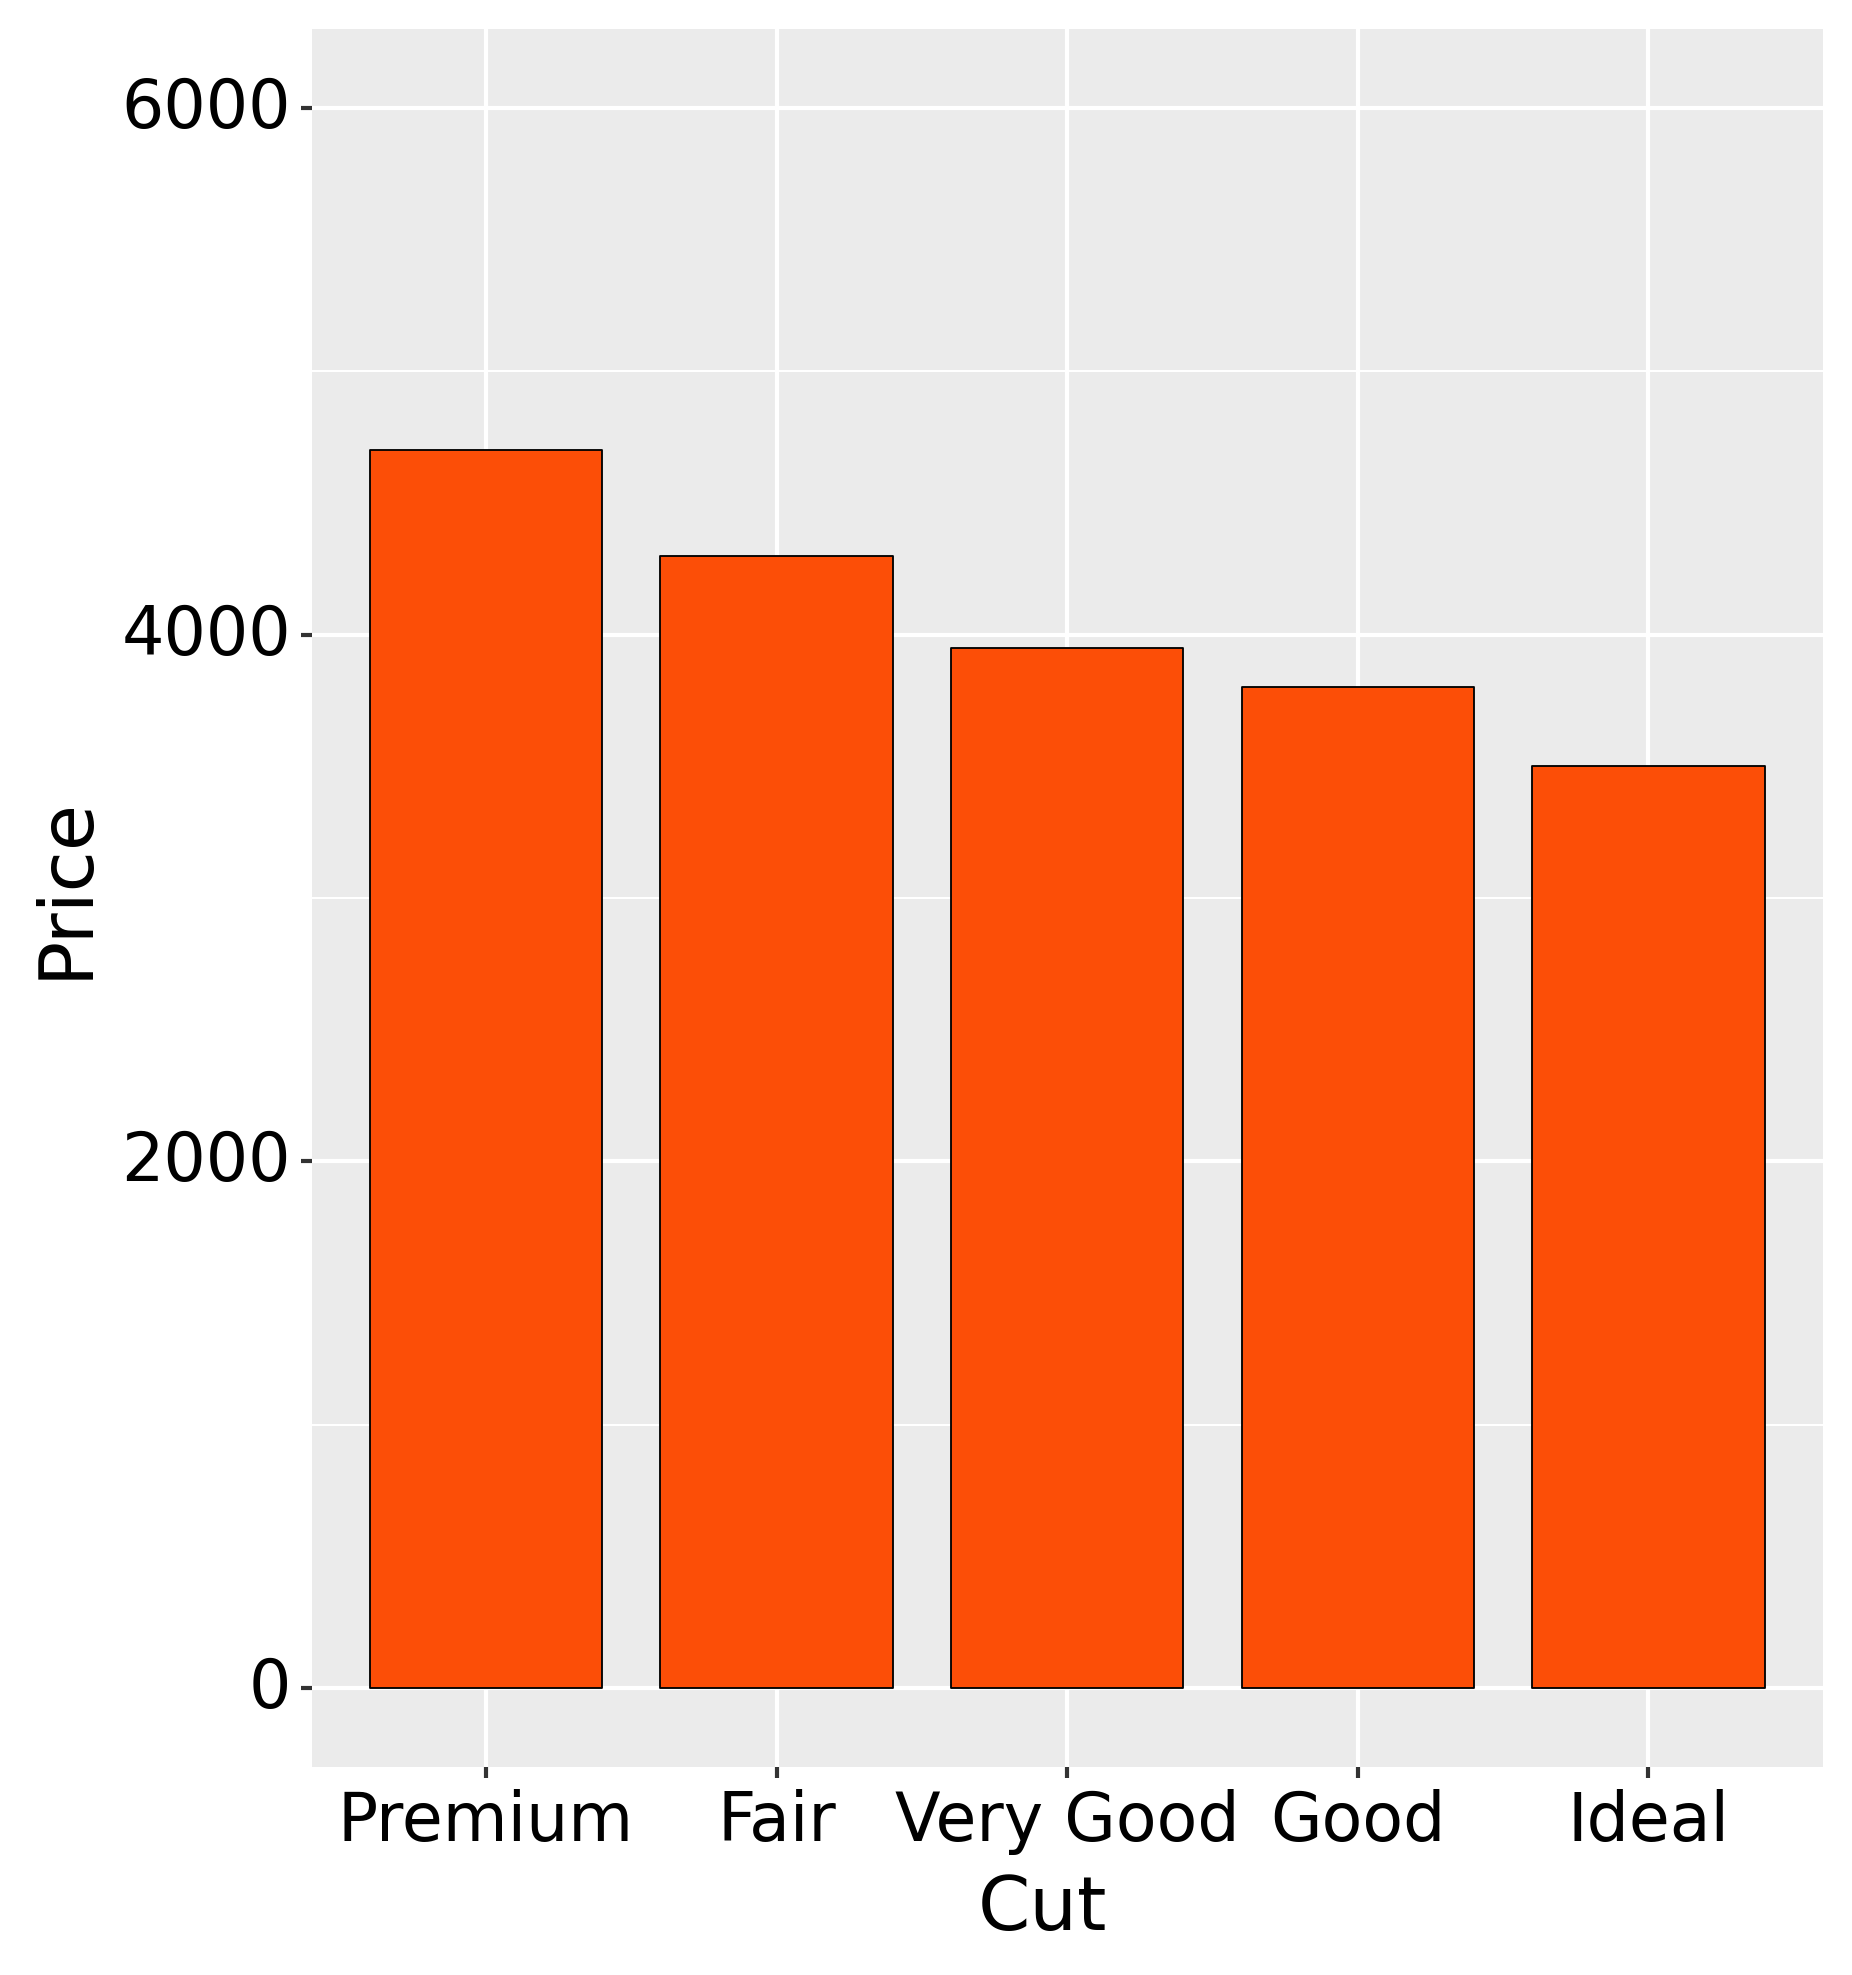

<ggplot: (8742344988645)>


In [45]:
#-----------------------(a)单数剧系列柱形图-------------------------------------------- 
mydata=pd.DataFrame({'Cut':["Fair","Good","Very Good","Premium","Ideal"],
                     'Price':[4300,3800,3950,4700,3500]})

Sort_data=mydata.sort_values(by='Price', ascending=False)

#Sort_data['Cut']=Sort_data['Cut'].astype("category",categories=Sort_data['Cut'],ordered=True)

Sort_data['Cut']=pd.Categorical(Sort_data['Cut'],ordered=True, categories=Sort_data['Cut'])

base_plot=(ggplot(Sort_data,aes('Cut','Price'))
+geom_bar(stat = "identity", width = 0.8,colour="black",size=0.25,fill="#FC4E07",alpha=1)  
+ylim(0, 6000)
+theme(
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 300
       )
)
print(base_plot)
#base_plot.save('Bar_Plot.pdf')

使用matplotlib包绘制柱形图时，会直接按照表格中的数据系列顺序绘制，并不涉及分类数据的类别（categories）的处理，其具体代码如下所示。

Text(0, 0.5, 'Price')

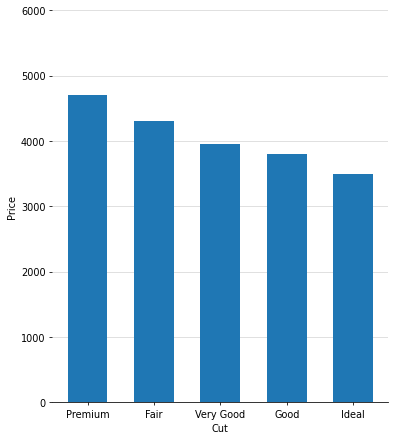

In [32]:
#-----------------------(a) 单数剧系列柱形图-------------------------------------------- 
mydata=pd.DataFrame({'Cut':["Fair","Good","Very Good","Premium","Ideal"],
                     'Price':[4300,3800,3950,4700,3500]})

Sort_data=mydata.sort_values(by='Price', ascending=False)


fig=plt.figure(figsize=(6,7),dpi=70)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y",c=(217/256,217/256,217/256))         #设置网格线   
                           #将网格线置于底层
ax = plt.gca()#获取边框
ax.spines['top'].set_color('none')  # 设置上‘脊梁’为红色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')  # 设置上‘脊梁’为无色

plt.bar(Sort_data['Cut'],Sort_data['Price'],width=0.6,align="center",label="Cut")

plt.ylim(0,6000) #设定x轴范围
plt.xlabel('Cut')
plt.ylabel('Price')

### 绘制多数据系列柱形图
plotnine包提供了绘制柱形图系列的函数geom_bar()，其中width控制柱形的宽度；position设置为’dodge'，表示柱形并排展示；也可以通过设置position_dodge（width =0.7），改变两个数据系列的间隔。图4-1-2(b)多数据系列柱形图的具体实现代码如下所示。

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


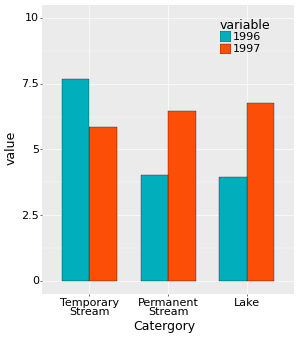

<ggplot: (8742346938381)>


In [31]:
#------------------------(b)双数剧系列柱形图---------------------------------------------  

df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/MultiColumn_Data.csv')
df=df.sort_values(by='1996', ascending=False)
mydata=pd.melt(df, id_vars='Catergory')

mydata['Catergory']=pd.Categorical(mydata['Catergory'],ordered=True, categories=df['Catergory'])


base_plot=(ggplot(mydata,aes(x='Catergory',y='value',fill='variable'))
+geom_bar(stat="identity", color="black", position='dodge',width=0.7,size=0.25)
+scale_fill_manual(values=["#00AFBB", "#FC4E07", "#E7B800"])
+ylim(0, 10)
+theme(legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       legend_background=element_blank(),
       legend_position=(0.75,0.80),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 300
       )
)
print(base_plot)
#base_plot.save('Bar_Plot2.pdf')

在matplotlib包中可以使用plt.bar()函数绘制多数据系列柱形图。相比plotnine需要使用一维表数据绘制图表，matplotlib 则需要使用二维表数据绘制图表，所以需要依次使用 plt.bar()函数绘制多个数据系列的柱形。由于matplotlib的二维图表使用数值型坐标轴，所以需要先根据数值型坐标轴设定每个数据系列的位置，然后使用plt.xticks()函数将数值型坐标轴的标签替换成类别文本型，从而构造类别型坐标轴。因此，在绘制多数据系列柱形图时，matplotlib的语法就显得比plotnine冗余很多，具体实现代码如下所示。

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


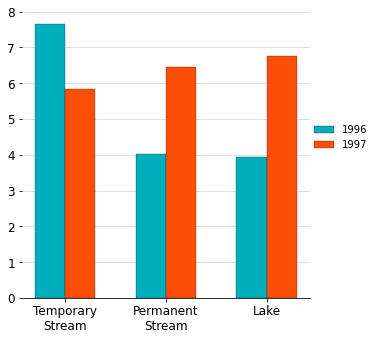

In [33]:
#-------------------------(b)双数剧系列柱形图-------------------------------------------

df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/MultiColumn_Data.csv')
df=df.sort_values(by='1996', ascending=False)

x_label=np.array(df["Catergory"])
x=np.arange(len(x_label))
y1=np.array(df["1996"])
y2=np.array(df["1997"])

fig=plt.figure(figsize=(5,5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)           #设置绘图区域大小位置

plt.bar(x,y1,width=0.3,color='#00AFBB',label='1996',edgecolor='k', linewidth=0.25) #调整y1轴位置，颜色，label为图例名称，与下方legend结合使用
plt.bar(x+0.3,y2,width=0.3,color='#FC4E07',label='1997',edgecolor='k', linewidth=0.25) #调整y2轴位置，颜色，label为图例名称，与下方legend结合使用
plt.xticks(x+0.15,x_label,size=12) #设置x轴刻度，位置,大小

plt.legend(loc=(1,0.5),ncol=1,frameon=False) #显示图例，loc图例显示位置(可以用坐标方法显示），ncol图例显示几列，默认为1列,frameon设置图形边框

plt.yticks(size=12) #设置y轴刻度，位置,大小
plt.grid(axis="y",c=(217/256,217/256,217/256)) #设置网格线
                     #将y轴网格线置于底层
#plt.xlabel("Quarter",labelpad=10,size=18,) #设置x轴标签,labelpad设置标签距离x轴的位置
#plt.ylabel("Amount",labelpad=10,size=18,)  #设置y轴标签,labelpad设置标签距离y轴的位置


ax = plt.gca()  #获取整个表格边框
ax.spines['top'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置右‘脊梁’为无色
ax.spines['left'].set_color('none')  # 设置左‘脊梁’为无色

### 绘制堆积柱形图
将plotnine中的柱形图系列图表绘制函数geom_bar()的参数position设置为"stack"，就可以绘制堆积柱形图。图4-1-2(c)堆积柱形图的具体实现代码如下所示。

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


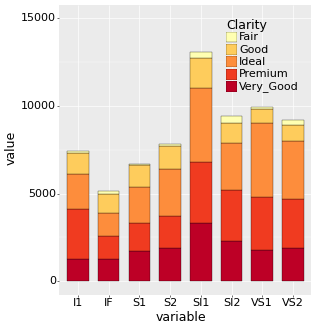

<ggplot: (8742346866861)>


In [34]:
#------------------------(c)堆积柱形图---------------------------------------------  
df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/StackedColumn_Data.csv') 

Sum_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=0).sort_values(ascending=False)

meanRow_df=df.iloc[:,1:].apply(lambda x: x.mean(), axis=1)

Sing_df=df['Clarity'][meanRow_df.sort_values(ascending=True).index]

mydata=pd.melt(df,id_vars='Clarity')

#from pandas.api.types import CategoricalDtype
#print(mydata)
#mydata['variable']=mydata['variable'].astype("category",categories= Sum_df.index,ordered=True) 
#mydata['Clarity']=mydata['Clarity'].astype("category",categories= Sing_df,ordered=True)

base_plot=(ggplot(mydata,aes(x='variable',y='value',fill='Clarity'))
+geom_bar(stat="identity", color="black", position='stack',width=0.7,size=0.25)
+scale_fill_brewer(palette="YlOrRd")
+ylim(0, 15000)
+theme(
       legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       legend_background=element_blank(),
       legend_position=(0.75,0.75),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 300
       )
)
print(base_plot)
#base_plot.save('Bar_Plot3.pdf')

在matplotlib中可以使用plt.bar()函数绘制堆积柱形图。在绘制堆积柱形图时，matplotlib的语法依旧显得比plotnine冗余很多，需要依次使用plt.bar()函数绘制每个数据系列，而且需要设置bottom参数（前几个数据系列的累加数值），语法极其麻烦，具体代码如下所示。 

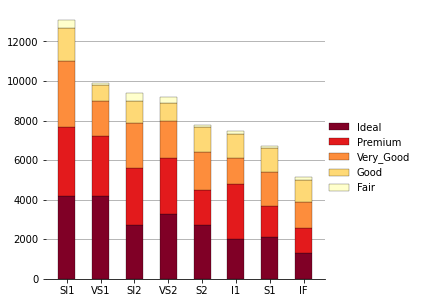

In [35]:
#----------------------------------(c)堆积柱形图---------------------------------------------  
df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/StackedColumn_Data.csv') 
df=df.set_index("Clarity")

Sum_df=df.apply(lambda x: x.sum(), axis=0).sort_values(ascending=False)
df=df.loc[:,Sum_df.index]

meanRow_df=df.apply(lambda x: x.mean(), axis=1)
Sing_df=meanRow_df.sort_values(ascending=False).index

n_row,n_col=df.shape
#x_label=np.array(df.columns)
x_value=np.arange(n_col)

cmap=cm.get_cmap('YlOrRd_r',n_row)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]

bottom_y=np.zeros(n_col)

fig=plt.figure(figsize=(5,5))
#plt.subplots_adjust(left=0.1, right=0.9, top=0.7, bottom=0.1)

for i in range(n_row):
    label=Sing_df[i]
    plt.bar(x_value,df.loc[label,:],bottom=bottom_y,width=0.5,color=color[i],label=label,edgecolor='k', linewidth=0.25)   
    bottom_y=bottom_y+df.loc[label,:].values        
    
plt.xticks(x_value,df.columns,size=10)  #设置x轴刻度
#plt.tick_params(axis="x",width=5)

plt.legend(loc=(1,0.3),ncol=1,frameon=False)

plt.grid(axis="y",c=(166/256,166/256,166/256))

ax = plt.gca()                         #获取整个表格边框
ax.spines['top'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置右‘脊梁’为无色
ax.spines['left'].set_color('none')  # 设置左‘脊梁’为无色

### 绘制百分比堆积柱形图
将plotnine包中的柱形图系列图表绘制函数geom_bar()的参数position设置为"fill"，就可以绘制百分比堆积柱形图。图4-1-2(d)百分比堆积柱形图的具体实现代码如下所示。

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


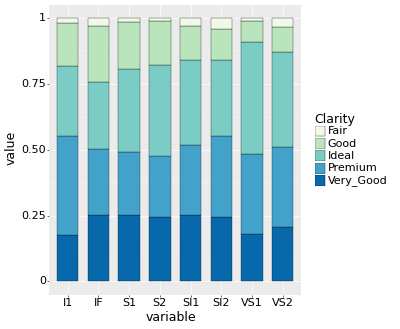

<ggplot: (8742346980397)>


In [36]:
#---------------------------------(d)百分比堆积柱形图------------------------------------------------
df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/StackedColumn_Data.csv') 

SumCol_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=0)

df.iloc[:,1:]=df.iloc[:,1:].apply(lambda x: x/SumCol_df, axis=1)

meanRow_df=df.iloc[:,1:].apply(lambda x: x.mean(), axis=1)

Per_df=df.iloc[meanRow_df.idxmax(),1:].sort_values(ascending=False)

Sing_df=df['Clarity'][meanRow_df.sort_values(ascending=True).index]

mydata=pd.melt(df,id_vars='Clarity')
#mydata['Clarity']=mydata['Clarity'].astype("category", categories=Sing_df, ordered=True) 
#mydata['variable']=mydata['variable'].astype("category", categories=Per_df.index, ordered=True) 


base_plot=(ggplot(mydata,aes(x='variable',y='value',fill='Clarity'))
+geom_bar(stat="identity", color="black", position='fill',width=0.7,size=0.25)
+scale_fill_brewer(palette="GnBu")
#+ylim(0, 10)
+theme(
       #text=element_text(size=15,face="plain",color="black"),
       legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
)
print(base_plot)
#base_plot.save('Bar_Plot4.pdf')

在matplotlib包中可以使用plt.bar()函数绘制百分比堆积柱形图。在绘制百分比堆积柱形图时，matplotlib 的语法依旧显得比plotnine冗余很多，需要先计算多数据系列的数据，转换成每个类别的百分比数据，然后依次使用 plt.bar()函数绘制每个数据系列，而且需要设置 bottom 参数（前几个数据系列的累加数值）。最后还需要设置Y 轴的标签格式为百分比形式，语法极其麻烦，具体代码如下所示。

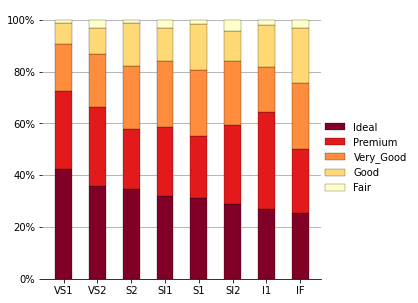

In [37]:
#---------------------------------(d) 百分比堆积柱形图------------------------------------------------
df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/StackedColumn_Data.csv') 

df=df.set_index("Clarity")

SumCol_df=df.apply(lambda x: x.sum(), axis=0)

df=df.apply(lambda x: x/SumCol_df, axis=1)

meanRow_df=df.apply(lambda x: x.mean(), axis=1)


Per_df=df.loc[meanRow_df.idxmax(),:].sort_values(ascending=False)


Sing_df=meanRow_df.sort_values(ascending=False).index


df=df.loc[:,Per_df.index]

n_row,n_col=df.shape

x_value=np.arange(n_col)

cmap=cm.get_cmap('YlOrRd_r',n_row)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]

bottom_y=np.zeros(n_col)

fig=plt.figure(figsize=(5,5))
#plt.subplots_adjust(left=0.1, right=0.9, top=0.7, bottom=0.1)

for i in range(n_row):
    label=Sing_df[i]
    plt.bar(x_value,df.loc[label,:],bottom=bottom_y,width=0.5,color=color[i],label=label,edgecolor='k', linewidth=0.25)   
    bottom_y=bottom_y+df.loc[label,:].values        
    
plt.xticks(x_value,df.columns,size=10)  #设置x轴刻度
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

plt.legend(loc=(1,0.3),ncol=1,frameon=False)

plt.grid(axis="y",c=(166/256,166/256,166/256))

ax = plt.gca()                         #获取整个表格边框
ax.spines['top'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置右‘脊梁’为无色
ax.spines['left'].set_color('none')  # 设置左‘脊梁’为无色

## 条形图系列 

In [38]:
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt 

**技能：绘制堆积条形图**

在用plotnine包绘制的条形图中，Y 轴变量和图例变量默认按照字母顺序绘制，可以参照4.1节绘制柱形图系列的代码实现。只需要添加 plotnine的coord_flip()语句，就可以将X -Y 轴旋转，从而将柱形图转换成条形图，语法简单而易操作。其中，图4-2-1(c)堆积条形图的代码如下所示。

用matplotlib包绘制的条形图中，使用plt.barh()函数替代柱形图绘制函数plt.bar()，其他语法与柱形图的绘制基本一致，只是X 轴变成数值型坐标，而Y 轴变成类别型坐标。

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


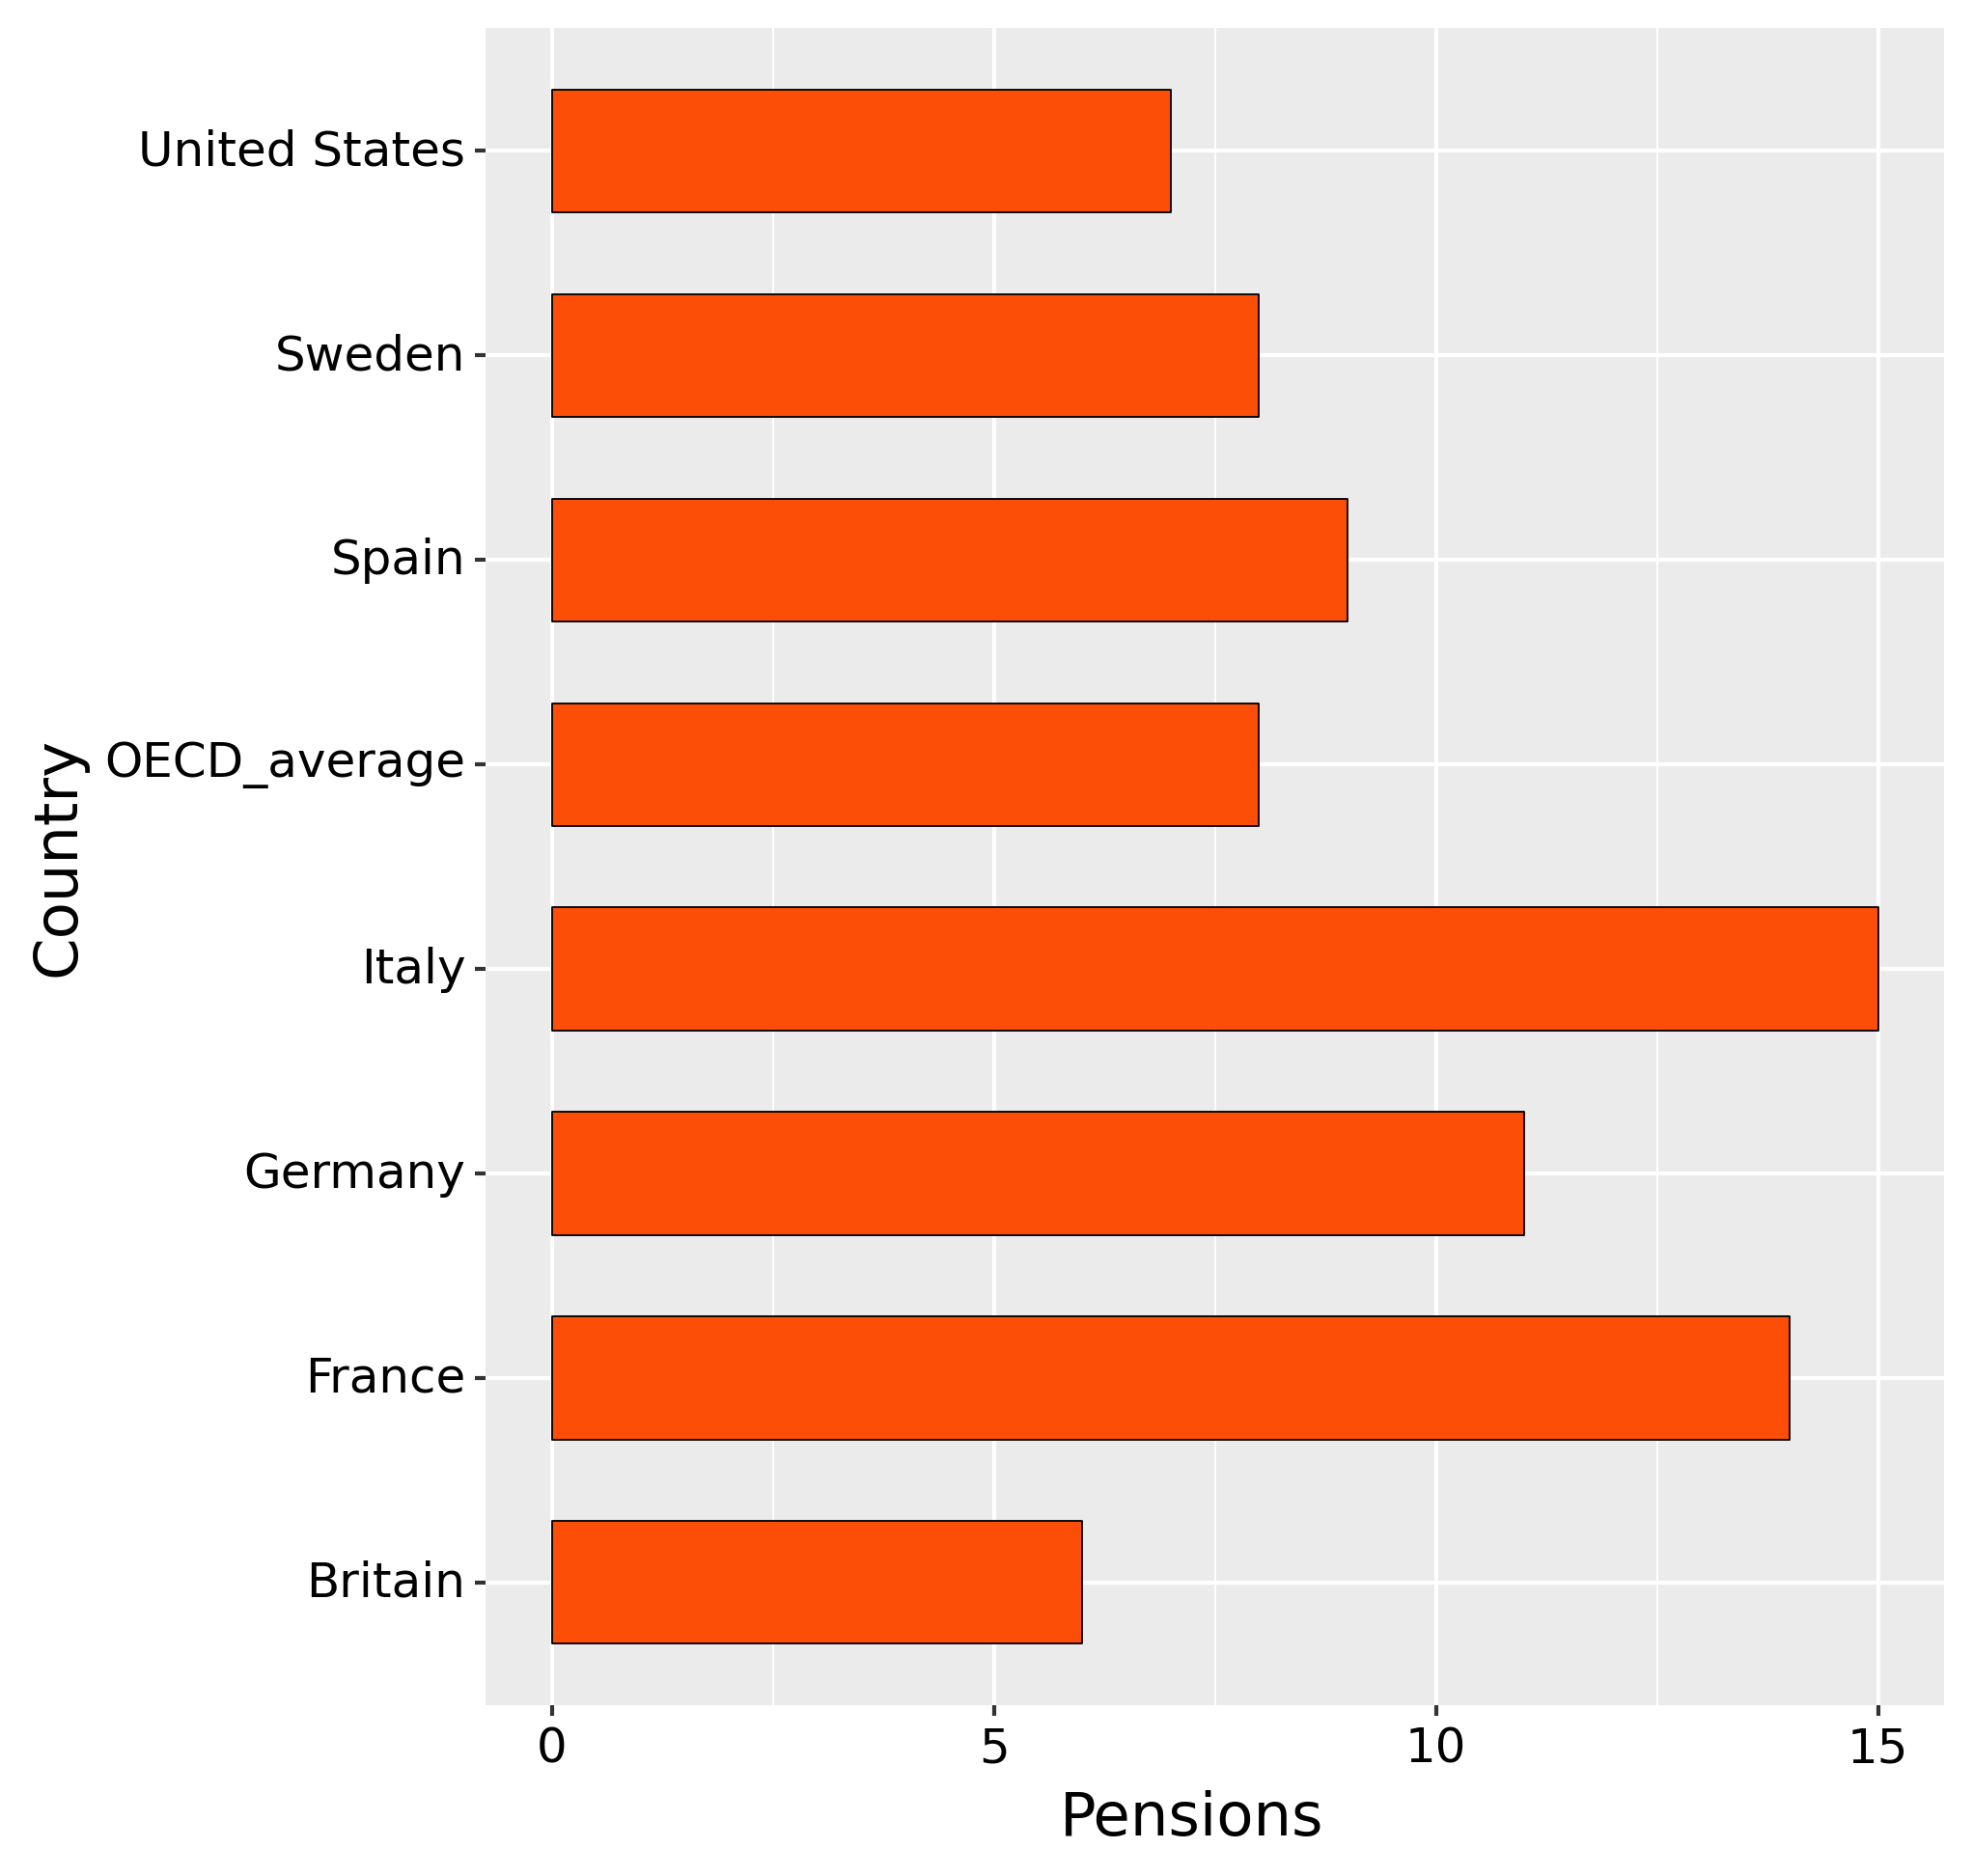

<ggplot: (8742347342405)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


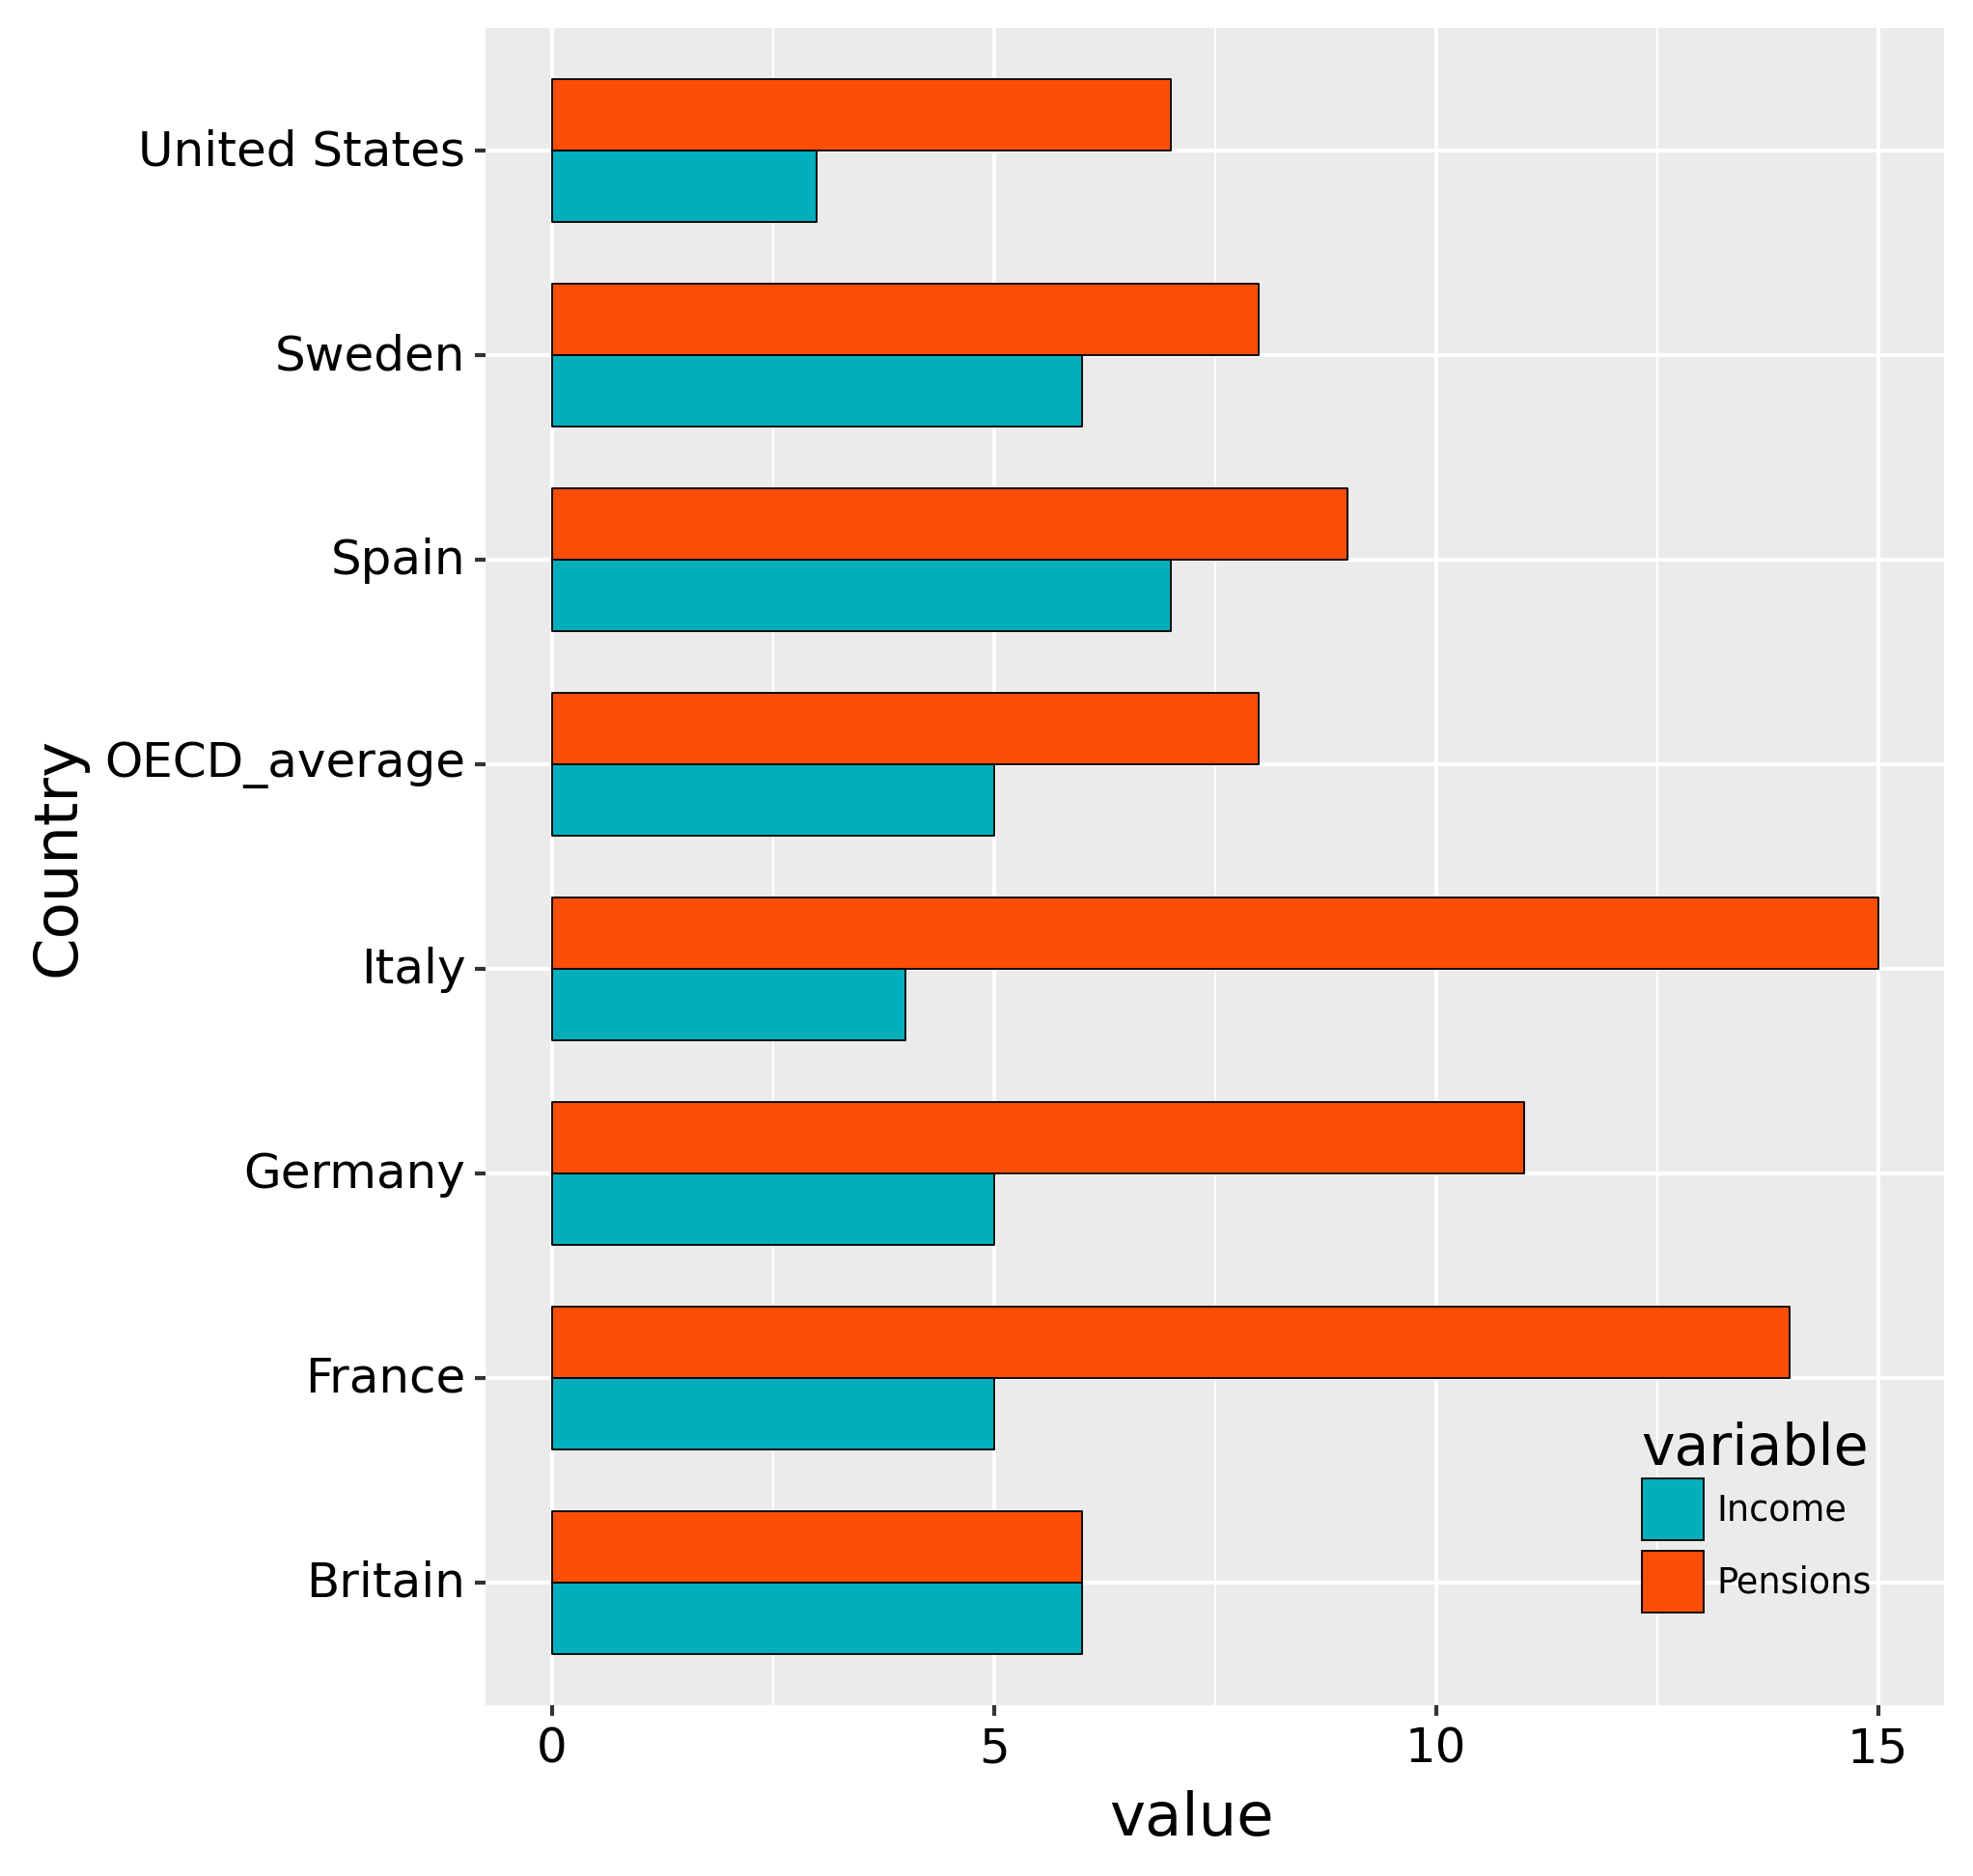

<ggplot: (8742345052977)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


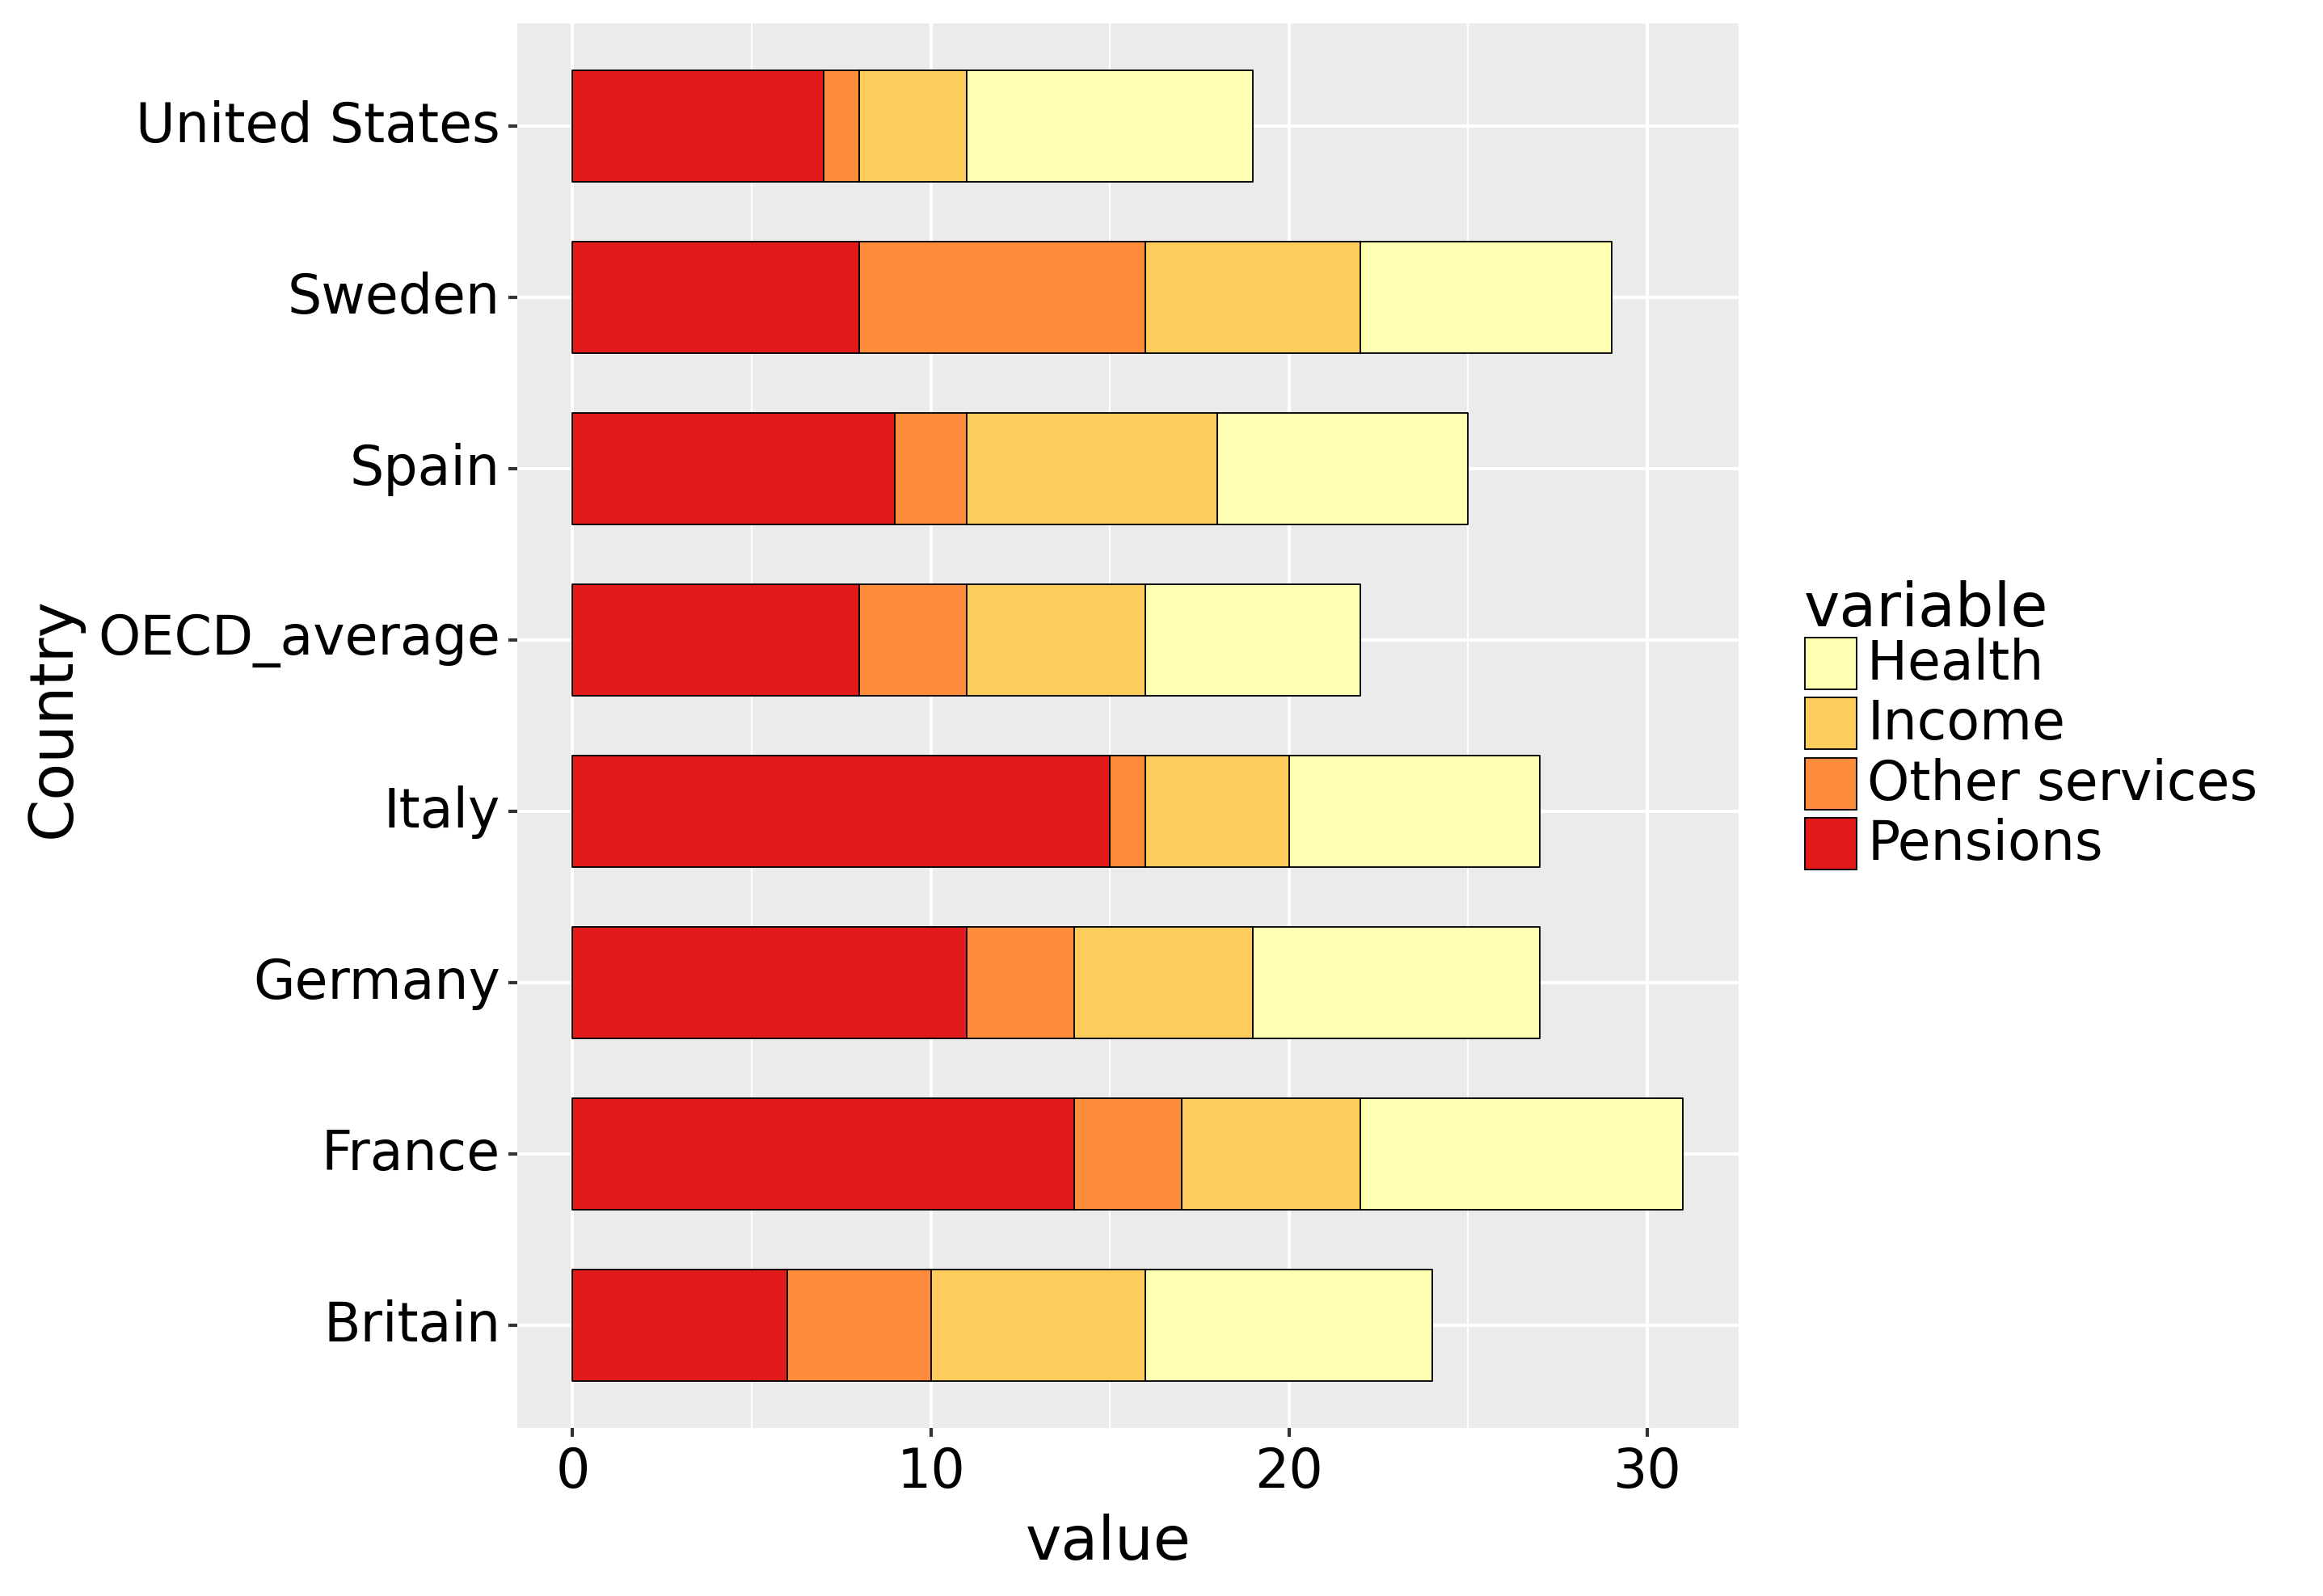

<ggplot: (8742345099689)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


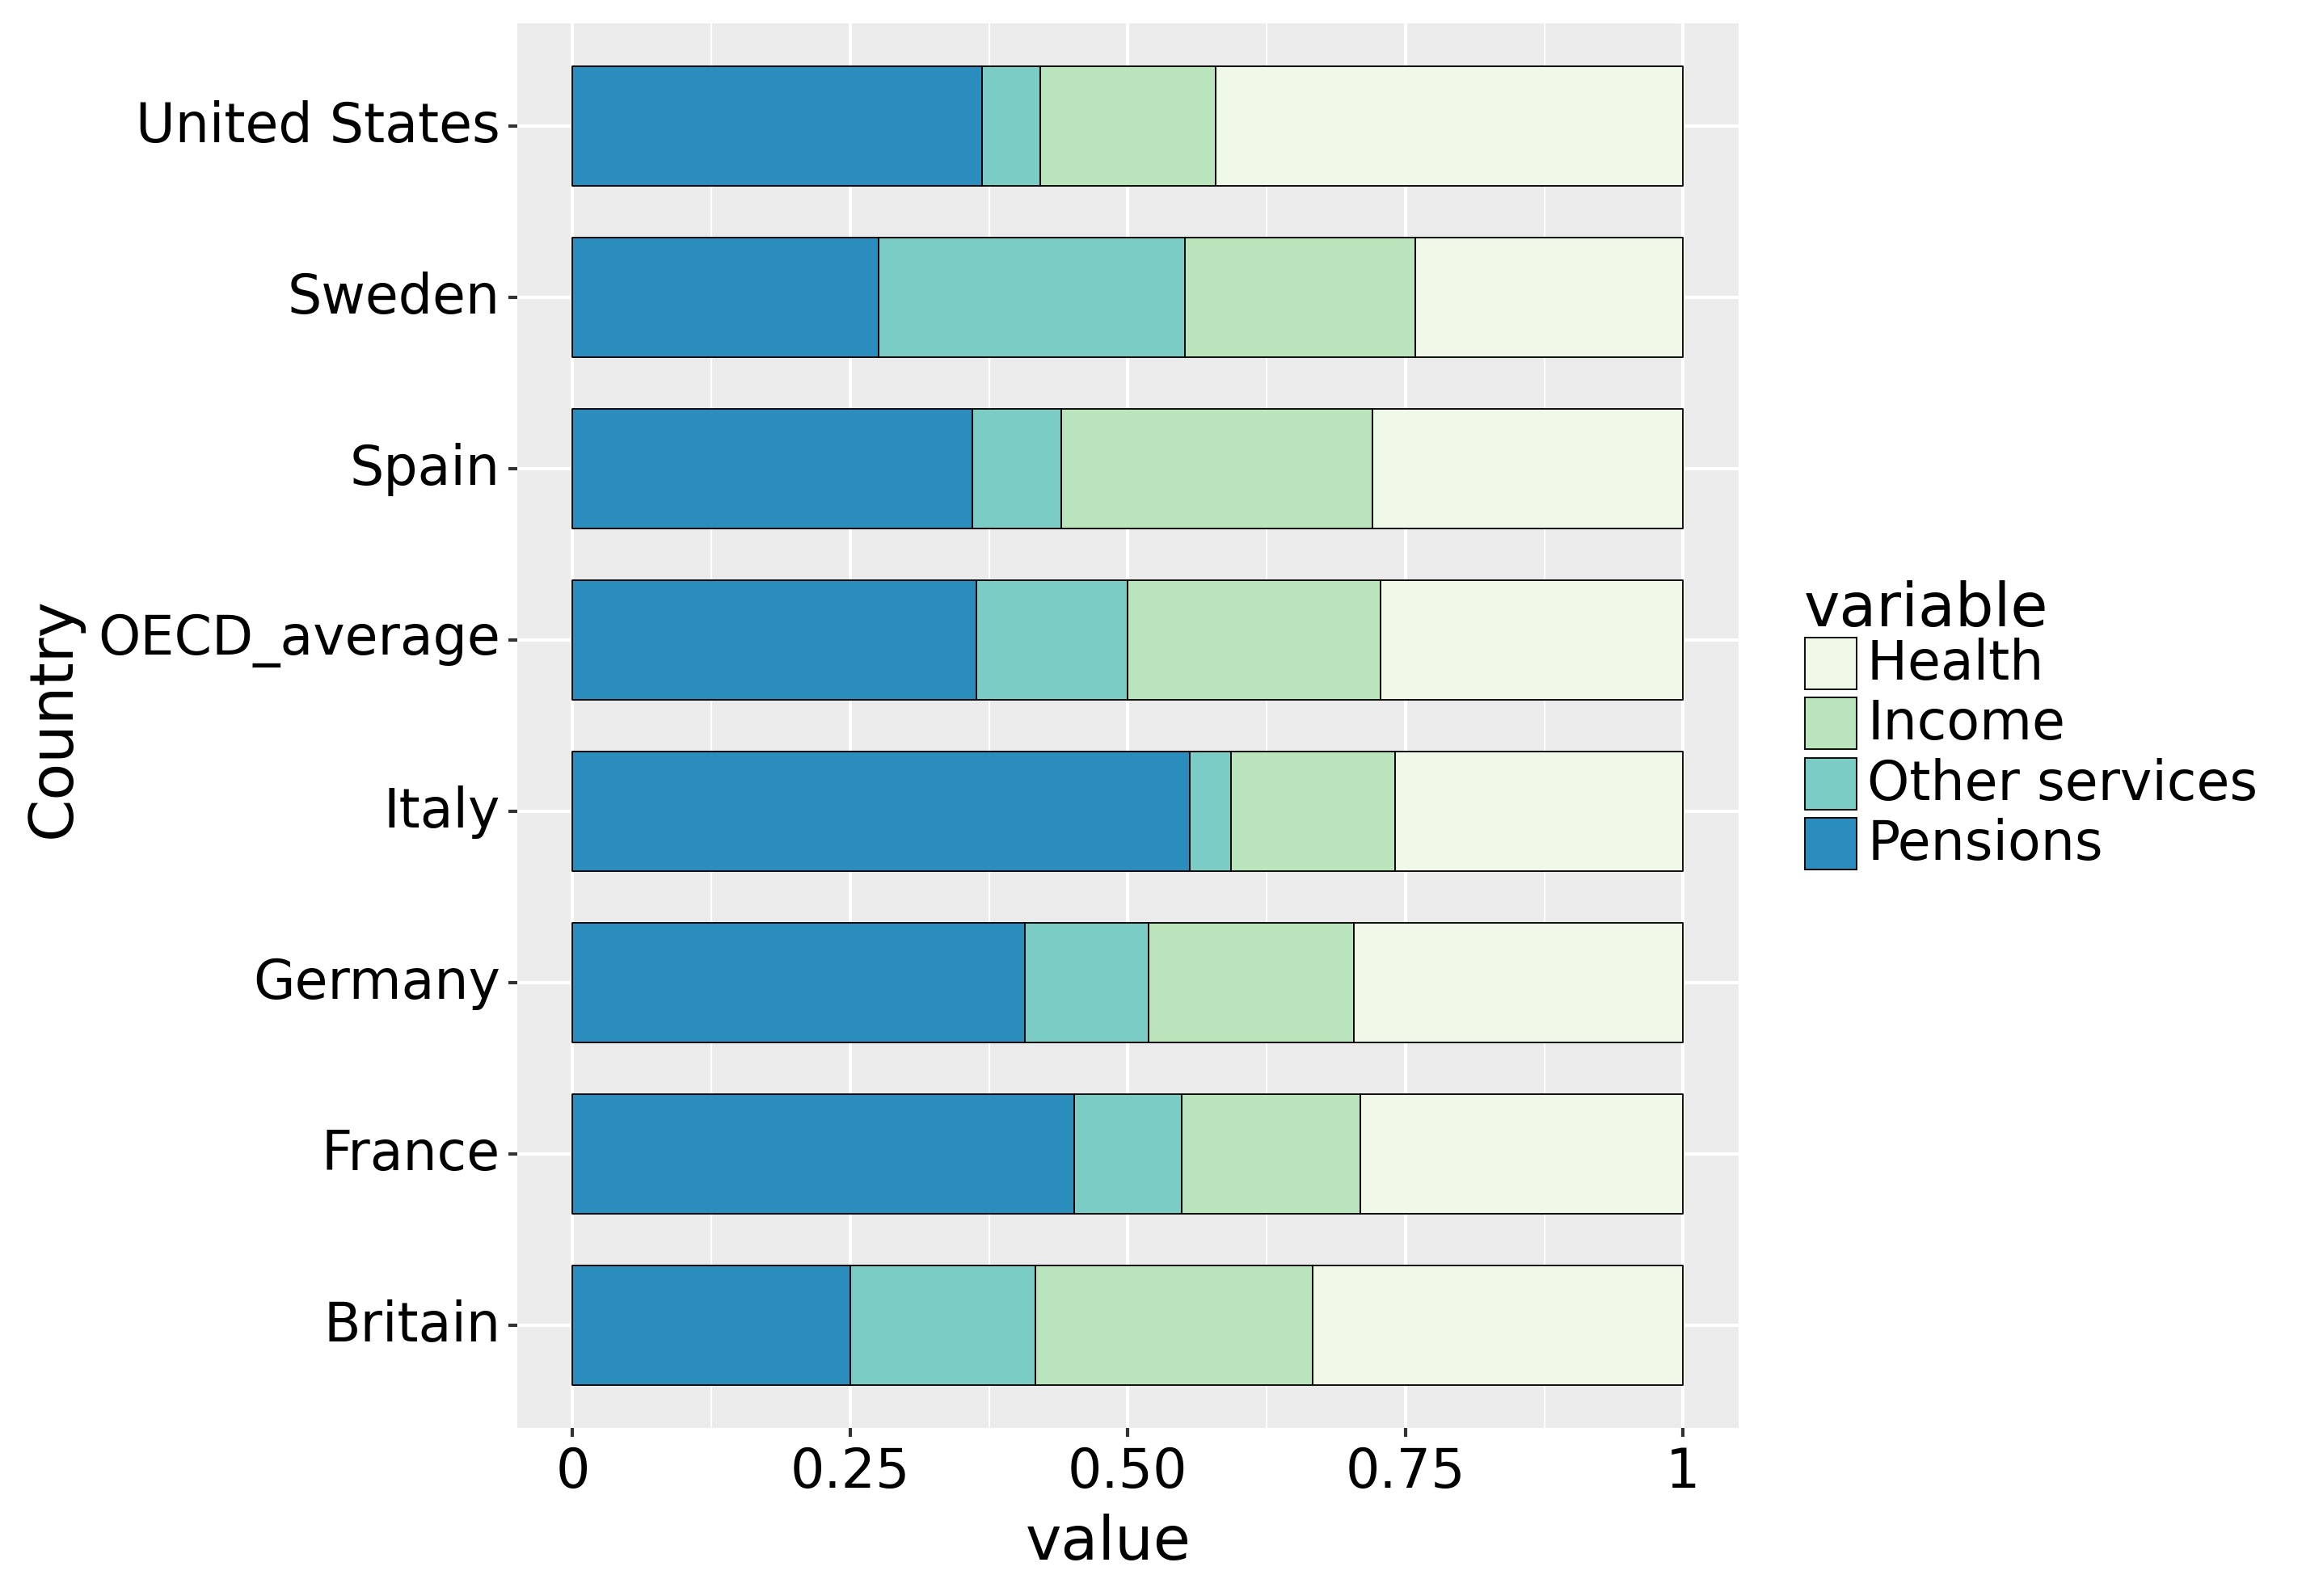

<ggplot: (8742345033241)>


In [44]:
#---------------------------(a) 单数剧系列条形图----------------------------------------------------

df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/StackedBar_Data.csv')

df=df.sort_values(by='Pensions', ascending=True)

#df['Country']=df['Country'].astype("category",categories= df['Country'],ordered=True)

base_plot=(ggplot(df,aes('Country','Pensions'))+
  geom_bar(stat="identity", color="black", width=0.6,fill="#FC4E07",size=0.25) +#"#00AFBB"
  #scale_fill_manual(values=brewer.pal(9,"YlOrRd")[c(6:2)])+
  coord_flip()+
  theme(
    axis_title=element_text(size=15,face="plain",color="black"),
    axis_text = element_text(size=12,face="plain",color="black"),
    legend_title=element_text(size=13,face="plain",color="black"),
    legend_position = "right",
    aspect_ratio =1.15,
    figure_size = (6.5, 6.5),
     dpi = 300
  ))
  
print(base_plot)

#---------------------------(b)双数剧系列条形图----------------------------------------------------

df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/StackedBar_Data.csv')

df=df.iloc[:,[0,2,1]]
df=df.sort_values(by='Pensions', ascending=True)
mydata=pd.melt(df,id_vars='Country')

#mydata['Country']=mydata['Country'].astype("category",categories= df['Country'],ordered=True)


base_plot=(ggplot(mydata,aes('Country','value',fill='variable'))+
  geom_bar(stat="identity", color="black", position=position_dodge(),width=0.7,size=0.25)+
  scale_fill_manual(values=("#00AFBB", "#FC4E07", "#E7B800"))+
  coord_flip()+
  theme(
    axis_title=element_text(size=15,face="plain",color="black"),
    axis_text = element_text(size=12,face="plain",color="black"),
    legend_title=element_text(size=14,face="plain",color="black"),
    legend_background  =element_blank(),
    legend_position = (0.8,0.2),
    aspect_ratio =1.15,
    figure_size = (6.5, 6.5),
     dpi = 300
  ))
print(base_plot)

#-------------------------------(c)堆积条形图-------------------------------------------------------
df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/StackedBar_Data.csv')
Sum_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=0).sort_values(ascending=True)
meanRow_df=df.iloc[:,1:].apply(lambda x: x.mean(), axis=1)
Sing_df=df['Country'][meanRow_df.sort_values(ascending=True).index]
mydata=pd.melt(df,id_vars='Country')
#mydata['variable']=mydata['variable'].astype("category",categories= Sum_df.index,ordered=True)
#mydata['Country']=mydata['Country'].astype("category",categories= Sing_df,ordered=True)


base_plot=(ggplot(mydata,aes('Country','value',fill='variable'))+
  geom_bar(stat="identity", color="black", position='stack',width=0.65,size=0.25)+
  scale_fill_brewer(palette="YlOrRd")+
  coord_flip()+
  theme(
    axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       legend_title=element_text(size=18,face="plain",color="black"),
       legend_text = element_text(size=16,face="plain",color="black"),
    legend_background  =element_blank(),
    legend_position = 'right',
    aspect_ratio =1.15,
    figure_size = (6.5, 6.5),
     dpi = 300
  ))
print(base_plot)
#base_plot.save('堆积条形图.pdf')

#------------------------------(d) 百分比堆积柱形图-------------------------------------------------------
df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/StackedBar_Data.csv')
SumCol_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=1)
df.iloc[:,1:]=df.iloc[:,1:].apply(lambda x: x/SumCol_df, axis=0)

meanRow_df=df.iloc[:,1:].apply(lambda x: x.mean(), axis=0).sort_values(ascending=True)
Per_df=df.loc[:,meanRow_df.idxmax()].sort_values(ascending=True)
Sing_df=df['Country'][Per_df.index]

mydata=pd.melt(df,id_vars='Country')
#mydata['Country']=mydata['Country'].astype("category",categories=Sing_df,ordered=True)
#mydata['variable']=mydata['variable'].astype("category",categories= meanRow_df.index,ordered=True)



base_plot=(ggplot(mydata,aes(x='Country',y='value',fill='variable'))
+geom_bar(stat="identity", color="black", position='fill',width=0.7,size=0.25)
+scale_fill_brewer(palette="GnBu")
+coord_flip()
+theme(
       #text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       legend_title=element_text(size=18,face="plain",color="black"),
       legend_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 300
       )
)
print(base_plot)
#base_plot.save('百分比堆积柱形图.pdf')

## 不等宽柱形图
plotnine 包提供了绘制矩形的函数：geom_rect()。geom_rect()函数可以根据右下角坐标(xmin, ymin)和左上角坐标(xmax, ymax)绘制矩形，矩形的宽度（width）为xmax～xmin对应X 轴变量的数值大小，矩形的高度（height）为ymax～ymin对应Y 轴变量的数值大小。图4-3-1不等宽柱形图的图 技能 绘制不等宽柱形图 plotnine 包提供了绘制矩形的函数：geom_rect()。geom_rect()函数可以根据右下角坐标(xmin, ymin)和左上角坐标(xmax, ymax)绘制矩形，矩形的宽度（width）为xmax～xmin对应X 轴变量的数值大小，矩形的高度（height）为ymax～ymin对应Y 轴变量的数值大小。图4-3-1不等宽柱形图的具体实现代码如下所示。 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categor

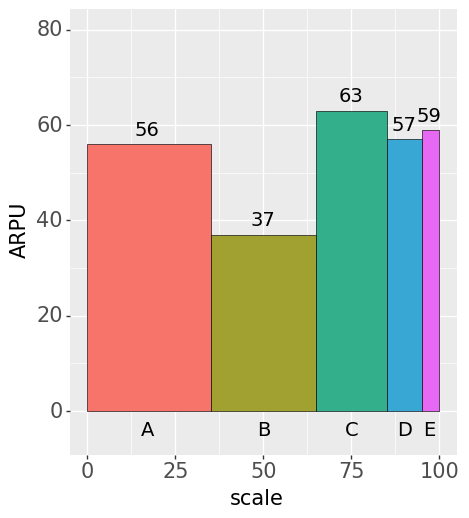

<ggplot: (8742347221929)>


In [46]:
import pandas as pd
import numpy as np
from plotnine import *

mydata=pd.DataFrame(dict(Name=['A','B','C','D','E'],
                         Scale=[35,30,20,10,5],
                         ARPU=[56,37,63,57,59]))

#构造矩形X轴的起点（最小点）
mydata['xmin']=0
for i in range(1,5):
    mydata['xmin'][i]=np.sum(mydata['Scale'][0:i])
    
#构造矩形X轴的终点（最大点）
mydata['xmax']=0
for i in range(0,5):
    mydata['xmax'][i]=np.sum(mydata['Scale'][0:i+1])

mydata['label']=0
for i in range(0,5):
    mydata['label'][i]=np.sum(mydata['Scale'][0:i+1])-mydata['Scale'][i]/2
    
base_plot=(ggplot(mydata)+
  geom_rect(aes(xmin='xmin',xmax='xmax',ymin=0,ymax='ARPU',fill='Name'),colour="black",size=0.25)+
  geom_text(aes(x='label',y='ARPU+3',label='ARPU'),size=14,color="black")+
  geom_text(aes(x='label',y=-4,label='Name'),size=14,color="black")+
  scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
  ylab("ARPU")+
  xlab("scale")+
  ylim(-5,80)+
  theme(#panel_background=element_rect(fill="white"),
        #panel_grid_major = element_line(colour = "grey",size=.25,linetype ="dotted" ),
        #panel_grid_minor = element_line(colour = "grey",size=.25,linetype ="dotted" ),
        text=element_text(size=15),
        legend_position="none",
        aspect_ratio =1.15,
        figure_size = (5, 5),
        dpi = 100
  ))
print(base_plot)

## 克利夫兰点图系列 
### 技能 绘制棒棒糖图 
plotnine 包提供了散点绘制函数geom_point()及连接线函数 geom_segment()。其中，geom_segment()函数根据起点坐标(x , y )和终点坐标(xend, yend)绘制两者之间的连接线。棒棒糖图的连接线为平行于X 轴水平绘制，其长度（length）对应于X 轴变量的数值。图4-4-1(a)棒棒糖图的具体实现代码如下所示。图4-4-1(b)克利夫兰点图就是在棒棒糖图的基础上只保留散点。 
### 技能 绘制哑铃图 
plotnine 包提供了散点绘制函数geom_point()及连接线函数 geom_segment()。其中，geom_segment()的起点和终点分别对应数据系列1数据点P(x, y) 和数据系列2数据点Q(x, y)。图4-4-1(c)所示哑铃图的实现代码如下所示。 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


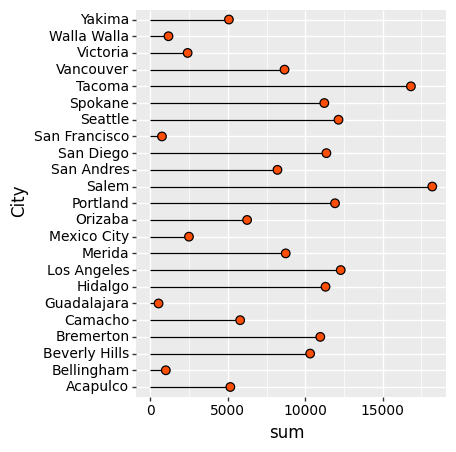

<ggplot: (8742346846581)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


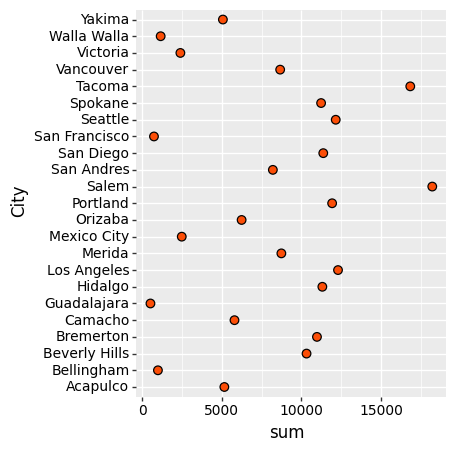

<ggplot: (8742347210053)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


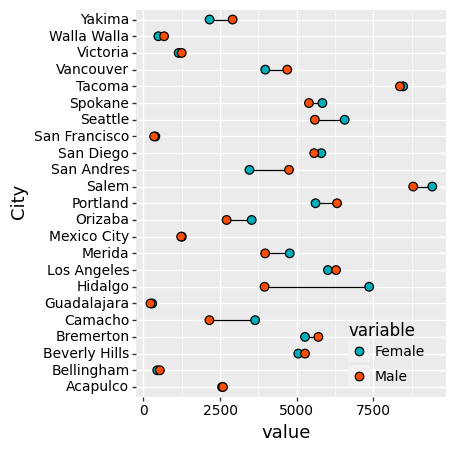

<ggplot: (8742345073301)>


In [51]:
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt 

#------------------------------(a)棒棒糖图----------------------------------------------------

df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/DotPlots_Data.csv')

df['sum']=df.iloc[:,1:3].apply(np.sum,axis=1)

df=df.sort_values(by='sum', ascending=True)
#df['City']=df['City'].astype("category",categories= df['City'],ordered=True)

base_plot=(ggplot(df, aes('sum', 'City')) +
  geom_segment(aes(x=0, xend='sum',y='City',yend='City'))+
  geom_point(shape='o',size=3,colour="black",fill="#FC4E07")+
  theme(
    axis_title=element_text(size=12,face="plain",color="black"),
    axis_text = element_text(size=10,face="plain",color="black"),
    #legend_title=element_text(size=14,face="plain",color="black"),
   aspect_ratio =1.25,
    figure_size = (4, 4),
     dpi = 100
  ))
  
print(base_plot)
#----------------------------- (b) 克利夫兰点图 ---------------------------------------
base_plot=(ggplot(df, aes('sum', 'City')) +

  geom_point(shape='o',size=3,colour="black",fill="#FC4E07")+
  theme(
    axis_title=element_text(size=12,face="plain",color="black"),
    axis_text = element_text(size=10,face="plain",color="black"),
    #legend_title=element_text(size=14,face="plain",color="black"),
   aspect_ratio =1.25,
    figure_size = (4, 4),
     dpi = 100
  ))
  
print(base_plot)

#----------------------------------(c) 哑铃图------------------------

df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/DotPlots_Data.csv')

df=df.sort_values(by='Female', ascending=True)
#df['City']=df['City'].astype("category",categories= df['City'],ordered=True)
mydata=pd.melt(df,id_vars='City')

base_plot=(ggplot(mydata, aes('value','City',fill='variable')) +
  geom_line(aes(group = 'City')) +
   geom_point(shape='o',size=3,colour="black")+
  scale_fill_manual(values=("#00AFBB", "#FC4E07","#36BED9"))+
  theme(
    axis_title=element_text(size=13,face="plain",color="black"),
    axis_text = element_text(size=10,face="plain",color="black"),
    legend_title=element_text(size=12,face="plain",color="black"),
    legend_text = element_text(size=10,face="plain",color="black"),
    legend_background = element_blank(),
    legend_position = (0.75,0.2),
  aspect_ratio =1.25,
    figure_size = (4, 4),
     dpi = 100
  ))
  
print(base_plot)

## 坡度图
plotnine 包提供了 geom_segment()函数，可以绘制两点之间的直线，geom_point()函数可以绘制两根直线上的数据点。图4-5-1(a)所示图表的具体实现代码如下所示。

图4-5-1(b)与图4-5-1(a)所示图表的代码的主要区别有两个：① 先把读入的数据框df，使用melt()函数根据“continent”列融合，再计算左标签（left_label）、右标签（right_label）和类别（class）; ② 两点之间的多个数据点使用geom_line()函数实现折线连接。图4-5-1(b)所示图表的具体实现代码如下所示。

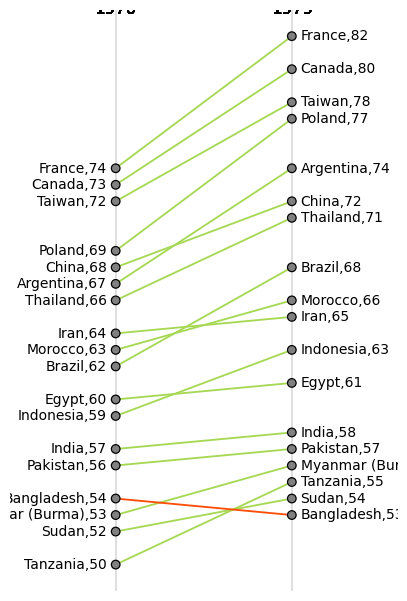

<ggplot: (8742346724321)>


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 84 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 84 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


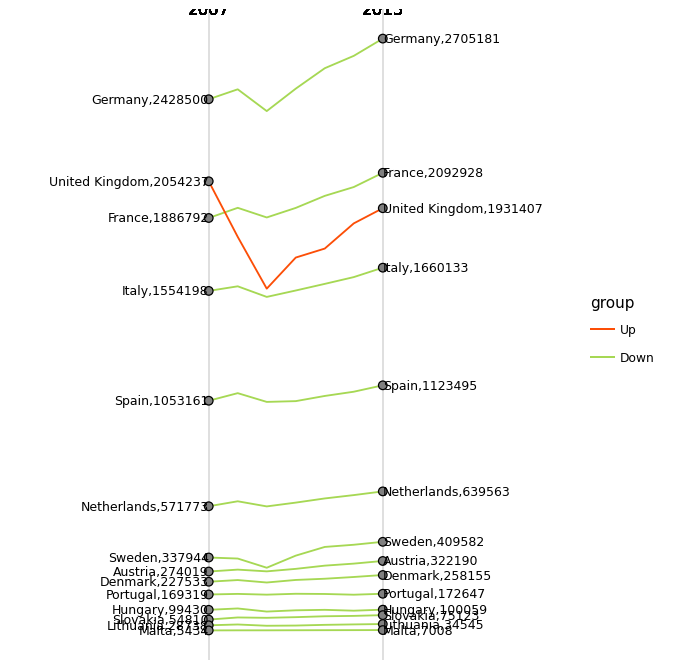

<ggplot: (8742345026045)>


In [53]:
import pandas as pd
import numpy as np
from plotnine import *

#------------------------------------(a)两年份对比--------------------------------------------
df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/Slopecharts_Data1.csv')


left_label=df.apply(lambda x: x['Contry']+','+ str(x['1970']),axis=1)
right_label=df.apply(lambda x: x['Contry']+','+ str(x['1979']),axis=1)
df['class']=df.apply(lambda x: "red" if x['1979']-x['1970']<0 else "green",axis=1)

#list(map(lambda x,y:"red" if x-y<0 else "green", left_label,right_label))


base_plot=(ggplot(df) + 
  geom_segment(aes(x=1, xend=2, y='1970', yend='1979', color='class'), size=.75, show_legend=False) +  #连接线
  geom_vline(xintercept=1, linetype="solid", size=.1) + # 1952年的垂直直线
  geom_vline(xintercept=2, linetype="solid", size=.1) + # 1957年的垂直直线
  geom_point(aes(x=1, y='1970'), size=3,shape='o',fill="grey",color="black") + # 1952年的数据点
  geom_point(aes(x=2, y='1979'), size=3,shape='o',fill="grey",color="black") + # 1957年的数据点
  scale_color_manual(labels = ("Up", "Down"), values = ("#A6D854","#FC4E07")) +  
  xlim(.5, 2.5) )
# 添加文本信息
base_plot=( base_plot + geom_text(label=left_label, y=df['1970'], x=0.95,  size=10,ha='right')
+ geom_text(label=right_label, y=df['1979'], x=2.05, size=10,ha='left')
+ geom_text(label="1970", x=1, y=1.02*(np.max(np.max(df[['1970','1979']]))),  size=12)   
+ geom_text(label="1979", x=2, y=1.02*(np.max(np.max(df[['1970','1979']]))),  size=12) 
+theme_void()
+  theme(
    aspect_ratio =1.5,
    figure_size = (5, 6),
     dpi = 100
  )
)
print(base_plot)

#------------------------------------------(b)多年份对比---------------------------------------------------

df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/Slopecharts_Data2.csv')

df['group']=df.apply(lambda x: "green" if x['2007']>x['2013'] else "red",axis=1)

df2=pd.melt(df, id_vars=["continent",'group'])

df2.value=df2.value.astype(int)
df2.variable=df2.variable.astype(int)

left_label =df2.apply(lambda x:  x['continent']+','+ str(x['value']) if x['variable']==2007 else "",axis=1)
right_label=df2.apply(lambda x:  x['continent']+','+ str(x['value']) if x['variable']==2013 else "",axis=1)

left_point=df2.apply(lambda x: x['value'] if x['variable']==2007 else np.nan,axis=1)
right_point=df2.apply(lambda x: x['value'] if x['variable']==2013 else np.nan,axis=1)



base_plot=( ggplot(df2) + 
  geom_line(aes(x='variable', y='value',group='continent', color='group'),size=.75) + 
  geom_vline(xintercept=2007, linetype="solid", size=.1) + 
  geom_vline(xintercept=2013, linetype="solid", size=.1) +
  geom_point(aes(x='variable', y=left_point), size=3,shape='o',fill="grey",color="black") + 
  geom_point(aes(x='variable', y=right_point), size=3,shape='o',fill="grey",color="black") + 
  scale_color_manual(labels = ("Up", "Down"), values = ("#FC4E07",  "#A6D854")) +  
  xlim(2001, 2018) )

base_plot=( base_plot + geom_text(label=left_label, y=df2['value'], x=2007,  size=9,ha='right')
+ geom_text(label=right_label, y=df2['value'], x=2013, size=9,ha='left')
+ geom_text(label="2007", x=2007, y=1.05*(np.max(df2.value)),  size=12)   
+ geom_text(label="2013", x=2013, y=1.05*(np.max(df2.value)),  size=12) 
+theme_void()
+  theme(
    aspect_ratio =1.2,
    figure_size = (7, 9),
     dpi = 100
  )
)

print(base_plot)

## 南丁格尔玫瑰图系列(极坐标柱形图系列)

In [ ]:
import numpy as np
from matplotlib import cm,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import pandas as pd
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('axes',axisbelow=True)  

单数据系列： plotnine 暂不支持极坐标系的绘制，所以只能使用 matplotlib。当 ax =fig.add_axes(polar=True) 时，就可以把图表从二维直角坐标系转换成极坐标系。但是由于matplotlib 默认的极坐标系的 X 轴起始位置、Y 轴标签位置等不符合常规视觉习惯，所以需要使用ax.set_theta_offset(radian)、ax.set_theta_direction(-1)、ax.set_rlabel_position(angle)，其中radian、angle分别表示弧度制（0～2π）和角度制（0 o ~360o ）下的数值。然后使用plt.bar()函数实现柱形的绘制，最后还需要使用plt.xticks()函数调整坐标轴的标签。图4-6-2(b)的X 轴坐标为时间序列型，所以是根据X 轴时间顺序展示数据的，其具体实现代码如下所示。

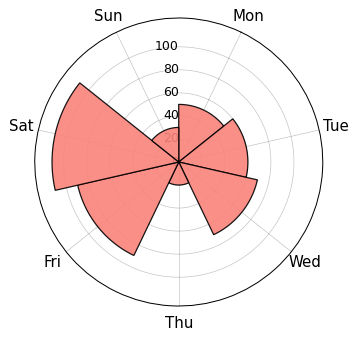

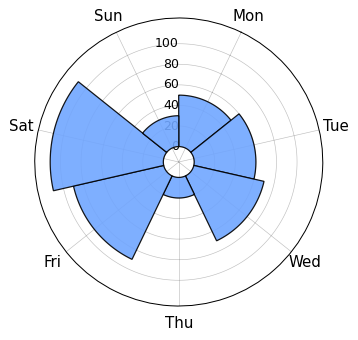

In [57]:
#-------------------------------(a)单数据系列---------------------------------------------
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Price=[50, 60, 70, 20,90,110,30]))
n_row= mydata.shape[0]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
radius = np.array(mydata.Price)
       
fig = figure(figsize=(4,4),dpi =90) 
#极坐标条形图，polar为True   
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
     
#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

#plt.bar(angle,radius, color='#70A6FF',edgecolor="k",width=0.90,alpha=0.9)
plt.bar(angle,radius, color='#F9837A',edgecolor="k",width=0.90,alpha=0.9)
#x轴坐标轴标签
plt.xticks(angle,labels=mydata.day,size=12)
#plt.ylim(-15,125)     
plt.ylim(0,125)   
plt.yticks(np.arange(0,120,20),verticalalignment='center',horizontalalignment='right')
 
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

plt.show()
#fig.savefig('极坐标图2.pdf')

#-------------------------------(b)单数据系列---------------------------------------------
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Price=[50, 60, 70, 20,90,110,30]))
n_row= mydata.shape[0]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
radius = np.array(mydata.Price)
       
fig = figure(figsize=(4,4),dpi =90) 
#极坐标条形图，polar为True   
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
     
#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

plt.bar(angle,radius, color='#70A6FF',edgecolor="k",width=0.90,alpha=0.9)
#plt.bar(angle,radius, color='#F9837A',edgecolor="k",width=0.90,alpha=0.9)
#x轴坐标轴标签
plt.xticks(angle,labels=mydata.day,size=12)
plt.ylim(-15,125)     
#plt.ylim(0,125)   
plt.yticks(np.arange(0,120,20),verticalalignment='center',horizontalalignment='right')
 
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

plt.show()

多数据系列： 图4-6-2(c)多数据系列南丁格尔玫瑰图的X 轴坐标（实际上是时间序列型变量）可以看作类别型变量，所以需要根据 Y 轴数值排序后展示数据，这个原理与堆积柱形图类似。根据处理后的数据绘制极坐标系下的堆积柱形图后，具体代码如下所示。

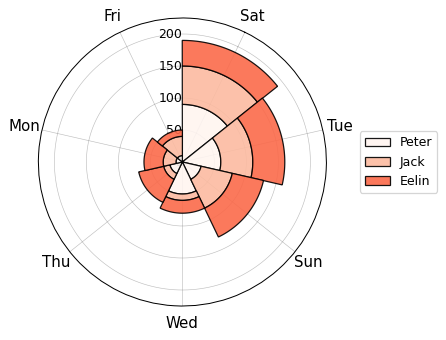

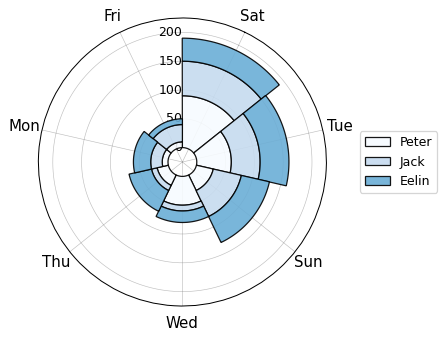

In [58]:
#-------------------------------(c)多数据系列-------------------------------------------
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Peter=[10, 60, 50, 20,10,90,30],
                      Jack=[20,50, 10, 10,30,60,50],
                      Eelin=[30, 50, 20, 40,10,40,50]))

mydata['sum']=mydata.iloc[:,1:4].apply(np.sum,axis=1)

mydata=mydata.sort_values(by='sum', ascending=False)#.iloc[:,0:3]
#df['City']=df['City'].astype("category",categories= df['City'],ordered=True)
n_row = mydata.shape[0]
n_col = mydata.shape[1]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
    #绘制的数据
radius1 = np.array(mydata.Peter)
radius2 = np.array(mydata.Jack)
radius3 = np.array(mydata.Eelin)
    #极坐标条形图，polar为True
cmap=cm.get_cmap('Reds',n_col)
#获取颜色主题Reds的Hex颜色编码
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]
  
    
fig = figure(figsize=(4,4),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    
#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)
  
p1 = plt.bar(angle,radius1, color=color[0],edgecolor="k",width=0.90,alpha=0.9,label="Peter")
p2 = plt.bar(angle,radius2, color=color[1],edgecolor="k",width=0.90, bottom=radius1,alpha=0.9,label="Jack")
p3 = plt.bar(angle,radius3, color=color[2],edgecolor="k",width=0.90, bottom=radius1+radius2,alpha=0.9,label="Eelin")
#p4 = plt.bar(ind, without, width, color="grey", bottom=deficient)
    
#plt.bar(angle,radius, color='#F8766D',edgecolor="k",width=0.90)
plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

plt.ylim(0,225)
plt.xticks(angle,labels=mydata.day,size=12)
plt.yticks(np.arange(0,201,50),verticalalignment='center',horizontalalignment='right')
#plt.ylim(-25,225)       
#plt.yticks(np.arange(0,225,50)) 

plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

#fig.savefig('极坐标图3.pdf')


#-------------------------------(d)多数据系列-------------------------------------------
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Peter=[10, 60, 50, 20,10,90,30],
                      Jack=[20,50, 10, 10,30,60,50],
                      Eelin=[30, 50, 20, 40,10,40,50]))

mydata['sum']=mydata.iloc[:,1:4].apply(np.sum,axis=1)

mydata=mydata.sort_values(by='sum', ascending=False)#.iloc[:,0:3]
#df['City']=df['City'].astype("category",categories= df['City'],ordered=True)
n_row = mydata.shape[0]
n_col = mydata.shape[1]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
    #绘制的数据
radius1 = np.array(mydata.Peter)
radius2 = np.array(mydata.Jack)
radius3 = np.array(mydata.Eelin)
    #极坐标条形图，polar为True
cmap=cm.get_cmap('Blues',n_col)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]
  
    
fig = figure(figsize=(4,4),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    
#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)
  
p1 = plt.bar(angle,radius1, color=color[0],edgecolor="k",width=0.90,alpha=0.9,label="Peter")
p2 = plt.bar(angle,radius2, color=color[1],edgecolor="k",width=0.90, bottom=radius1,alpha=0.9,label="Jack")
p3 = plt.bar(angle,radius3, color=color[2],edgecolor="k",width=0.90, bottom=radius1+radius2,alpha=0.9,label="Eelin")
#p4 = plt.bar(ind, without, width, color="grey", bottom=deficient)
    
#plt.bar(angle,radius, color='#F8766D',edgecolor="k",width=0.90)
plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

#plt.ylim(0,225)
plt.xticks(angle,labels=mydata.day,size=12)
plt.yticks(np.arange(0,201,50),verticalalignment='center',horizontalalignment='right')
plt.ylim(-25,225)       
#plt.yticks(np.arange(0,225,50)) 

plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

#fig.savefig('极坐标图3.pdf')

## 径向柱图

### 技能 绘制径向柱图 

径向柱图的绘制其实与用matplotlib绘制极坐标柱形图的方法基本类似，也是将直角坐标系转换成极坐标系，只是使Y 轴坐标不从0开始，关键的语句在于设定Y 轴的坐标范围ylim(ymin, ymax), ymin和ymax分别表示Y 轴的最小值和最大值。图4-7-2(b)多数据系列的径向柱图就是将直角坐标系下的多数据系列柱形图，转换成极坐标系，然后将Y 轴设定从负值开始，具体实现代码如下所示。

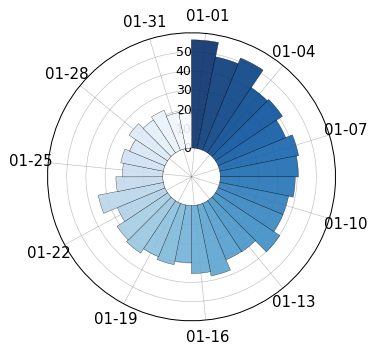

In [59]:
import datetime
import numpy as np
from matplotlib import cm,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import pandas as pd
plt.rcParams["patch.force_edgecolor"] = True
#plt.rc('axes',axisbelow=True)
plt.rcParams['axes.axisbelow'] = True


def dateRange(beginDate, endDate):
    dates = []
    dt = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
    date = beginDate[:]
    while date <= endDate:
        dates.append(date)
        dt = dt + datetime.timedelta(1)
        date = dt.strftime("%Y-%m-%d")
    return dates

mydata=pd.DataFrame(dict(day=dateRange("2016-01-01", "2016-02-01"),
                      Price=-np.sort(-np.random.normal(loc=30,scale=10,size=32))+
                             np.random.normal(loc=3,scale=3,size=32)))

mydata['day']=pd.to_datetime(mydata['day'], format="%Y/%m/%d")

n_row=mydata.shape[0]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
radius = np.array(mydata.Price)

fig = figure(figsize=(4,4),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

cmap=cm.get_cmap('Blues_r',n_row)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]

plt.bar(angle,radius,color=color,alpha=0.9,width=0.2,align="center", linewidth=0.25)

plt.ylim(-15,60)
index=np.arange(0,n_row,3)
plt.xticks(angle[index],labels=[x.strftime('%m-%d') for x in mydata.day[index]],size=12)
plt.yticks(np.arange(0,60,10),verticalalignment='center',horizontalalignment='right')


plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

#fig.savefig('径向柱图.pdf')

### 技能 绘制径向柱图 

极坐标跨度图： 极坐标跨度图是一种常用的时间序列的波动范围图表，可以用于表示价格、温度等随时间的变化产生的波动，如图4-7-3所示。 

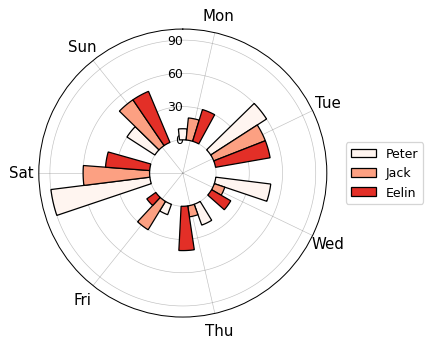

In [60]:
import numpy as np
from matplotlib import cm,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import pandas as pd

plt.rcParams["patch.force_edgecolor"] = True
   
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Peter=[10, 60, 50, 20,10,90,30],
                      Jack=[20,50, 10, 10,30,60,50],
                      Eelin=[30, 50, 20, 40,10,40,50]))

n_row = mydata.shape[0]
n_col= mydata.shape[1]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
    #绘制的数据
    
cmap=cm.get_cmap('Reds',n_col)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]
    
radius1 = np.array(mydata.Peter)
radius2 = np.array(mydata.Jack)
radius3 = np.array(mydata.Eelin)

fig = figure(figsize=(4,4),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360)


barwidth1=0.2  
barwidth2=0.2
plt.bar(angle,radius1,width=barwidth2, align="center",color=color[0],edgecolor="k",alpha=1,label="Peter")
plt.bar(angle+barwidth1,radius2,width=barwidth2,align="center", color=color[1],edgecolor="k",alpha=1,label="Jack")
plt.bar(angle+barwidth1*2,radius3,width=barwidth2,align="center", color=color[2],edgecolor="k",alpha=1,label="Eelin")

plt.legend(loc="center",bbox_to_anchor=(1.2, 0, 0, 1))

plt.ylim(-30,100)
plt.xticks(angle+2*np.pi/n_row/4,labels=mydata.day,size=12)

plt.yticks(np.arange(0,101,30),verticalalignment='center',horizontalalignment='right')


plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

#fig.savefig('径向柱图2.pdf')

### 技能 绘制极坐标跨度图 
极坐标跨度图其实是一种特殊的堆积柱形图，只是将最底下的柱形填充设置为无——“none”，可以使用plt.bar()函数实现。其中柱形长度数值使用颜色渐变条的颜色映射，更加便于观察数据规律。图4-7-3极坐标跨度图的具体实现代码如下所示。 

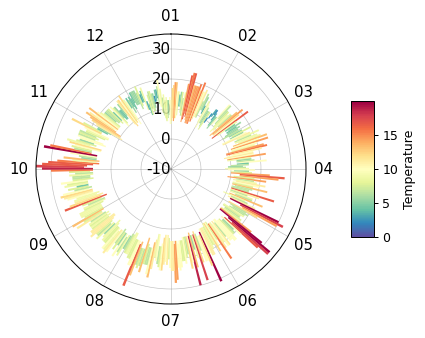

In [62]:
import numpy as np
from matplotlib import cm#,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc

#import matplotlib.dates as mdates
import pandas as pd
#from datetime import datetime
import matplotlib as mpl
plt.rcParams["patch.force_edgecolor"] = True

#years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator()  # every month
#monthsFmt = mdates.DateFormatter('%M')

df=pd.read_csv('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/PloarRange_Data.csv')

fig = figure(figsize=(5,5),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_rlabel_position(0)

plt.xticks(np.arange(0,359,30)/180*np.pi,["%.2d" % i for i in np.arange(1,13,1)], color="black", size=12)
plt.ylim(-10,35)
plt.yticks(np.arange(-10,40,10),color="black", size=12,verticalalignment='center',horizontalalignment='right')

plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

N = df.shape[0]

x_angles = [n / float(N) * 2 * np.pi for n in range(N)]
#x_angles += x_angles[:1]


upperlimits =(df['max.temperaturec']-df['min.temperaturec']).values
#upperlimits += upperlimits[:1]
lowerlimits = df['min.temperaturec'].values
#lowerlimits += lowerlimits[:1]

colors = cm.Spectral_r(upperlimits / float(max(upperlimits)))

#ax.bar(x_angles,lowerlimits, color='none',edgecolor='none',width=0.01,alpha=1)
#ax.bar(x_angles,upperlimits, color=colors,edgecolor='none',width=0.02, bottom=lowerlimits,alpha=1)

ax.bar(x_angles,lowerlimits, color='none',edgecolor='none',width=0.01,alpha=1)
ax.bar(x_angles,upperlimits, color=colors,edgecolor='none',width=0.02, bottom=lowerlimits,alpha=1)

ax2 = fig.add_axes([0.8, 0.25, 0.05, 0.3])
cmap = mpl.cm.Spectral_r
norm = mpl.colors.Normalize(vmin=0, vmax=20)
bounds = np.arange(0,20,0.1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm,boundaries=bounds,ticks=np.arange(0,20,5),spacing='proportional',label='Temperature')

plt.show()

#fig.savefig("图3-7-3极坐标跨度图_1.pdf")

## 雷达图系列 
在使用matplotlib绘制雷达图时，其实就是在极坐标系下绘制闭合的折线和面积图。由于要实现数据的闭合，所以会对X 轴数据angles和Y 轴数据values分别进行数据闭合处理：angles +=angles[:1]、values += values[:1]，然后使用ax.fill()和ax.plot()函数绘制带填充颜色的折线图。图4-8-1所示的带填充颜色的圆形雷达图的具体实现代码如下所示。 

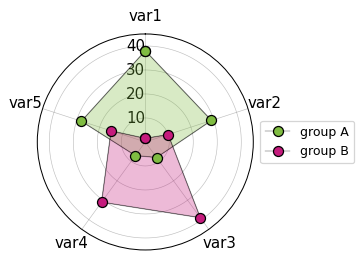

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib.pyplot import figure, show, rc 
plt.rcParams["patch.force_edgecolor"] = True


df = pd.DataFrame(dict(categories=['var1', 'var2', 'var3', 'var4', 'var5'], group_A=[38.0, 29, 8, 7, 28], group_B=[1.5, 10, 39, 31, 15]))
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(4,4),dpi =90)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], df['categories'], color="black", size=12)
plt.ylim(0,45)
plt.yticks(np.arange(10,50,10),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['group_A'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#7FBC41', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#7FBC41', markersize=8, color='k', linewidth=0.25,label="group A")

values=df['group_B'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#C51B7D', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#C51B7D', markersize=8, color='k', linewidth=0.25,label="group B")
plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

图4-8-2所示的带填充颜色的圆形雷达图的具体实现代码如下所示。 

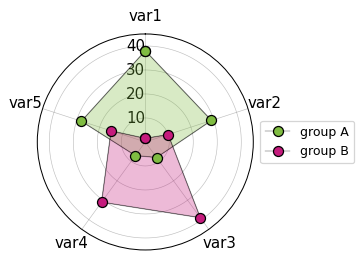

In [64]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib.pyplot import figure, show, rc 
plt.rcParams["patch.force_edgecolor"] = True


df = pd.DataFrame(dict(categories=['var1', 'var2', 'var3', 'var4', 'var5'],
                       group_A=[38.0, 29, 8, 7, 28],
                       group_B=[1.5, 10, 39, 31, 15]))
N = df.shape[0]
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
fig = figure(figsize=(4,4),dpi =90)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

plt.xticks(angles[:-1], df['categories'], color="black", size=12)
plt.ylim(0,45)
plt.yticks(np.arange(10,50,10),color="black", size=12,verticalalignment='center',horizontalalignment='right')

plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['group_A'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#7FBC41', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#7FBC41', markersize=8, color='k', linewidth=0.25,label="group A")

values=df['group_B'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#C51B7D', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#C51B7D', markersize=8, color='k', linewidth=0.25,label="group B")

plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

#fig.savefig("雷达图2.pdf")

### 词云图 
词云图可以通过wordcloud包的WordCloud()函数实现，不仅可以实现方形的词云图，还能借助PIL包的Image()函数导入二值化的图像，从而实现不同形状的词云图。在做中文文本分析时，可以借助jieba包做分词处理，然后使用WordCloud()函数做文本的统计分析。其中，图4-9-2(a)白色背景的方形词云图的具体实现代码如下所示。

In [67]:
import chardet
import jieba
import numpy as np
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc 

#-------------------------------------English-白色背景的方形词云图-----------------------------------------
# 获取当前文件路径
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# 获取文本text
#text = open(path.join(d,'WordCloud.txt')).read()
text = open('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/WordCloud.txt','r').read()
# 生成词云
#wc = WordCloud(scale=2,max_font_size = 100)
wc=WordCloud(font_path=None,  # 字体路径，英文不用设置路径，中文需要，否则无法正确显示图形
    width=400, # 默认宽度
    height=400, # 默认高度
    margin=2, # 边缘
    ranks_only=None, 
    prefer_horizontal=0.9, 
    mask=None, # 背景图形，如果想根据图片绘制，则需要设置
    scale=2, 
   color_func=None, 
   max_words=100, # 最多显示的词汇量
   min_font_size=4, # 最小字号
   stopwords=None, # 停止词设置，修正词云图时需要设置
   random_state=None, 
   background_color='white', # 背景颜色设置，可以为具体颜色,比如white或者16进制数值
   max_font_size=None, # 最大字号
   font_step=1, 
   mode='RGB', 
   relative_scaling='auto', 
   regexp=None, 
   collocations=True, 
   colormap='Reds', # matplotlib 色图，可更改名称进而更改整体风格
   normalize_plurals=True, 
   contour_width=0, 
   contour_color='black', 
   repeat=False)

wc.generate_from_text(text)
# 显示图像

fig = figure(figsize=(4,4),dpi =100)  
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
#fig.savefig("词云图1.pdf")
plt.show()

#-------------------------------------中文-黑色背景的圆形词云图-----------------------------------------
#text = open(path.join(d,'WordCloud_Chinese.txt'),'rb').read()
text = open('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/WordCloud_Chinese.txt',"r").read()
text_charInfo = chardet.detect(text)
print(text_charInfo)
# 结果
#{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
#text = open(path.join(d,r'WordCloud_Chinese.txt'),encoding='GB2312',errors='ignore').read()
text = open('https://raw.githubusercontent.com/EasyChart/Beautiful-Visualization-with-python/master/%E7%AC%AC4%E7%AB%A0_%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8/WordCloud_Chinese.txt',encoding='GB2312',errors='ignore').read()

# 获取文本词排序，可调整 stopwords
process_word = WordCloud.process_text(wc,text)
sort = sorted(process_word.items(),key=lambda e:e[1],reverse=True)
print(sort[:50]) # # 获取文本词频最高的前50个词

text+=' '.join(jieba.cut(text,cut_all=False)) # cut_all=False 表示采用精确模式
#设置中文字体
font_path = 'SourceHanSansCN-Regular.otf'  # 思源黑体
# 读取背景图片
background_Image = np.array(Image.open(path.join(d, "WordCloud_Image.jpg")))
# 提取背景图片颜色
img_colors = ImageColorGenerator(background_Image)
# 设置中文停止词
stopwords = set('')
stopwords.update(['但是','一个','自己','因此','没有','很多','可以','这个','虽然','因为','这样','已经','现在','一些','比如','不是','当然','可能','如果','就是','同时','比如','这些','必须','由于','而且','并且','他们'])

wc = WordCloud(
        font_path = font_path, # 中文需设置路径
         #width=400, # 默认宽度
         #height=400, # 默认高度
        margin = 2, # 页面边缘
        mask = background_Image,
        scale = 2,
        max_words = 200, # 最多词个数
        min_font_size = 4, #
        stopwords = stopwords,
        random_state = 42,
        background_color = 'black', # 背景颜色
        #background_color = '#C3481A', # 背景颜色
        colormap='RdYlGn_r', # matplotlib 色图，可更改名称进而更改整体风格
        max_font_size = 100,
        )
wc.generate(text)
# 获取文本词排序，可调整 stopwords
process_word = WordCloud.process_text(wc,text)
sort = sorted(process_word.items(),key=lambda e:e[1],reverse=True)
print(sort[:50]) # 获取文本词频最高的前50个词
# 设置为背景色，若不想要背景图片颜色，就注释掉
#wc.recolor(color_func=img_colors)
#存储图像
#wc.to_file('浪潮之巅basic.png')
#显示图像
fig = figure(figsize=(4,4),dpi =100)  
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

#fig.savefig("词云图2.pdf")

plt.show()   

FileNotFoundError: ignored